In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from string import punctuation
from nltk.stem.porter import *
from gensim.models import Word2Vec,KeyedVectors
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from spellchecker import SpellChecker
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

tweet_id                                              tweet  sentiment
0         1701  #sxswnui #sxsw #apple defining language of tou...          1
1         1851  Learning ab Google doodles! All doodles should...          1
2         2689  one of the most in-your-face ex. of stealing t...          2
3         4525  This iPhone #SXSW app would b pretty awesome i...          0
4         3604  Line outside the Apple store in Austin waiting...          1
5          966  #technews One lone dude awaits iPad 2 at Apple...          1
6         1395  SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...          1
7         8182  NU user RT @mention New #UberSocial for #iPhon...          1
8         8835     Free #SXSW sampler on iTunes {link} #FreeMusic          2
9          883  I think I might go all weekend without seeing ...          2
10        6398  RT @mention Official #SXSW App Û÷SXSW GOÛª b...          3
11        2369  It's official! I'm buying an iPad. #SXSW #elevate          2
12        3944  They're giving away iPad 2's, x boxes and book...          2
13        6909  RT @mention We're officially at #SXSW! Come by...          1
14        7917  #Companies to watch, from the #SXSW trade show...          1
15        5849  RT @mention Google Marissa Mayer, future of lo...          1
16        1955  DL the #Calyp App to get into #Calyp Casa at #...          1
17        1472  Well yeah.  Music &gt; iPhone nerds RT @mentio...          2
18        4730  Apple Opens Pop Up Store at SXSW {link} via @m...          1
19        2166  @mention atleast you are at #sxsw. I'm not the...          1
20        3497  Cue the choir music #SXSW  @mention Apple Stor...          1
21         165  Anyone at #sxsw want an iPad 2? I'm in line an...          1
22        1352  _¼ÛÄ___ü ___¡  _____«_µ... &gt;&gt; @mention...          2
23        6431  RT @mention P.S. @mention and Google throw a b...          2
24         634  .@mention I have a 3G iPhone. After 3 hrs twee...          0
25        4544  does anyone know if google did talk about #cir...          1
26         568  ÛÏ@mention Google set to launch new social ne...          1
27         775  Google to Launch Major New Social Network Call...          1
28        5368  standing on a long line surrounded by unemploy...          3
29        3087  WOW! *Something Ventured* was a kick ass film....          1
...        ...                                                ...        ...
7244      4996  Google looks to the future with mobile, locati...          1
7245      4887  Fantastico! RT @mention Marissa Mayer: Google ...          2
7246      5027  RT @mention \r\nAn Apple pop-uitp store at #SX...          1
7247       409  wishes he could be at the @mention / @mention ...          1
7248       392  Tomorrow, Charles Chen will be speaking about ...          1
7249      2556  Z7: Lead Don't Follow {link} [codes valid: 4:0...          1
7250      5467  RT @mention Apple sets up 5,000-square-foot te...          1
7251      5290  RT @mention #SXSW gear bag: iPad 2, iPhone, Mo...          1
7252      7145  Û÷Viagra for your communicationsÛª @mention ...          2
7253      4635  Interesting! RT @mention Google to Launch Majo...          1
7254       780  Google to Launch Major New Social Network Call...          1
7255      7424  Sweet, Apple's opening a pop-up shop in the Sc...          2
7256      6739  RT @mention the future is about networks, not ...          0
7257      3891  Did you miss Google's VP of Search, Marissa Ma...          1
7258      4284  @mention massive lines at #sxsw apple store......          2
7259      1179  Exploring the World in 3D with XML combines Go...          2
7260      6157  RT @mention iPad hipster #AustinCrowd #SXSW {l...          2
7261      3525  The new Whrrl app is now live in the iPhone ap...          2
7262      8056  Come see something new about Google SketchUp P...          1
7263      1273  There are two apple stores in ATX!! RT @mentio...          2
72

In [5]:
cdf=df.copy()

In [6]:
cdf.head()

tweet_id                                              tweet  sentiment
0      1701  #sxswnui #sxsw #apple defining language of tou...          1
1      1851  Learning ab Google doodles! All doodles should...          1
2      2689  one of the most in-your-face ex. of stealing t...          2
3      4525  This iPhone #SXSW app would b pretty awesome i...          0
4      3604  Line outside the Apple store in Austin waiting...          1

In [7]:
cdf.shape

(7274, 3)

In [8]:
cdf.describe()

tweet_id    sentiment
count  7274.000000  7274.000000
mean   4531.736871     1.299148
std    2617.858745     0.607829
min       2.000000     0.000000
25%    2261.500000     1.000000
50%    4530.500000     1.000000
75%    6796.750000     2.000000
max    9092.000000     3.000000

In [9]:
cdf['sentiment'].value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

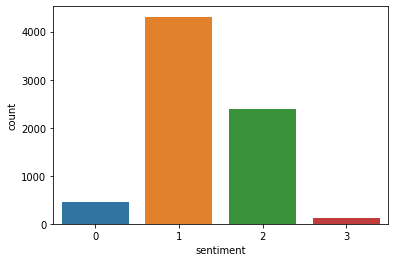

In [82]:
sns.countplot(x='sentiment',data=cdf)

In [10]:
texts = cdf['tweet'].tolist()

In [11]:
texts

['#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller',
 'Learning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw',
 'one of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}',
 "This iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork",
 'Line outside the Apple store in Austin waiting for the new iPad #SXSW  {link}',
 '#technews One lone dude awaits iPad 2 at Apple\x89Ûªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech',
 'SXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad',
 'NU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable',
 'Free #SXSW sampler on iTunes {link} #FreeMusic',
 'I think I might go a

In [77]:
df_1=cdf[cdf['sentiment']==1]['tweet']

In [84]:
cdf_lower1 = df_1.str.lower()

In [100]:
key_1=list(cdf_lower1)

In [101]:
type(key_1)

list

In [105]:
bow_11 = df_1.apply(lambda x:word_tokenize(str(x)))
type(bow_11)

pandas.core.series.Series

In [107]:
key_2=list(bow_11)

In [110]:
# Use list comprehension to convert a list of lists to a flat list 
flatList1 = [ item for elem in key_2 for item in elem]
print('Flat List : ', flatList1) 

Flat List :  ['#', 'sxswnui', '#', 'sxsw', '#', 'apple', 'defining', 'language', 'of', 'touch', 'with', 'different', 'dialects', 'becoming', 'smaller', 'Learning', 'ab', 'Google', 'doodles', '!', 'All', 'doodles', 'should', 'be', 'light', ',', 'funny', '&', 'amp', ';', 'innovative', ',', 'with', 'exceptions', 'for', 'significant', 'occasions', '.', '#', 'GoogleDoodle', '#', 'sxsw', 'Line', 'outside', 'the', 'Apple', 'store', 'in', 'Austin', 'waiting', 'for', 'the', 'new', 'iPad', '#', 'SXSW', '{', 'link', '}', '#', 'technews', 'One', 'lone', 'dude', 'awaits', 'iPad', '2', 'at', 'Apple\x89Ûªs', 'SXSW', 'store', '{', 'link', '}', '#', 'Tech_News', '#', 'Apple', '#', 'iPad_2', '#', 'SXSW', '#', 'tablets', '#', 'tech', 'SXSW', 'Tips', ',', 'Prince', ',', 'NPR', 'Videos', ',', 'Toy', 'Shopping', 'With', 'Zuckerberg', '.', '{', 'link', '}', '#', 'sxsw', '#', 'ipad', 'NU', 'user', 'RT', '@', 'mention', 'New', '#', 'UberSocial', 'for', '#', 'iPhone', 'now', 'in', 'the', 'App', 'Store', 'includ

In [111]:
filtered_sentence1 = [w for w in flatList1 if not w in stop_words]
print(filtered_sentence1)

['sxswnui', 'sxsw', 'apple', 'defining', 'language', 'touch', 'different', 'dialects', 'becoming', 'smaller', 'Learning', 'ab', 'Google', 'doodles', 'All', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'GoogleDoodle', 'sxsw', 'Line', 'outside', 'Apple', 'store', 'Austin', 'waiting', 'new', 'iPad', 'SXSW', 'link', 'technews', 'One', 'lone', 'dude', 'awaits', 'iPad', '2', 'Apple\x89Ûªs', 'SXSW', 'store', 'link', 'Tech_News', 'Apple', 'iPad_2', 'SXSW', 'tablets', 'tech', 'SXSW', 'Tips', 'Prince', 'NPR', 'Videos', 'Toy', 'Shopping', 'With', 'Zuckerberg', 'link', 'sxsw', 'ipad', 'NU', 'user', 'RT', 'mention', 'New', 'UberSocial', 'iPhone', 'App', 'Store', 'includes', 'UberGuide', 'SXSW', 'sponsored', 'Mashable', 'RT', 'mention', 'We', "'re", 'officially', 'SXSW', 'Come', 'mention', 'Grill', 'mention', 'us', 'w/', 'zazzlsxsw', 'you\x89Ûªll', 'get', 'make', 'iPhone', 'case', 'Companies', 'watch', 'SXSW', 'trade', 'show', 'floor', 'link', 'apps', '

In [112]:
freq_dist1 = nltk.FreqDist(filtered_sentence1)
freq_dist1

FreqDist({'mention': 3628, 'link': 2368, 'SXSW': 2317, 'sxsw': 2115, 'RT': 1459, 'Google': 1109, 'Apple': 822, 'quot': 820, 'iPad': 807, 'iPhone': 563, ...})

In [132]:
freq_df = pd.DataFrame(pd.DataFrame(freq_dist1,index=range(0,len(freq_dist1))).iloc[0,:].sort_values(ascending=False)[:10])
freq_df.columns = ['freq']
freq_df

freq
mention  3628
link     2368
SXSW     2317
sxsw     2115
RT       1459
Google   1109
Apple     822
quot      820
iPad      807
iPhone    563

In [115]:
list_key1=list(key_4)

In [116]:
top_10=list_key1[:10]

In [117]:
top_10

['sxswnui',
 'sxsw',
 'apple',
 'defining',
 'language',
 'touch',
 'different',
 'dialects',
 'becoming',
 'smaller']

In [118]:
df_2=cdf[cdf['sentiment']==2]['tweet']

In [119]:
cdf_lower2 = df_2.str.lower()

In [120]:
key_8=list(cdf_lower2)

In [121]:
type(key_8)

list

In [122]:
bow_111 = df_2.apply(lambda x:word_tokenize(str(x)))
type(bow_111)

pandas.core.series.Series

In [123]:
key_24=list(bow_111)

In [124]:
type(key_24)

list

In [125]:
# Use list comprehension to convert a list of lists to a flat list 
flatList2 = [ item for elem in key_24 for item in elem]
print('Flat List : ', flatList2) 

Flat List :  ['one', 'of', 'the', 'most', 'in-your-face', 'ex', '.', 'of', 'stealing', 'the', 'show', 'in', 'yrs', 'RT', '@', 'mention', '&', 'quot', ';', 'At', '#', 'SXSW', ',', 'Apple', 'schools', 'the', 'mkt', 'experts', '&', 'quot', ';', '{', 'link', '}', 'Free', '#', 'SXSW', 'sampler', 'on', 'iTunes', '{', 'link', '}', '#', 'FreeMusic', 'I', 'think', 'I', 'might', 'go', 'all', 'weekend', 'without', 'seeing', 'the', 'same', 'iPad', 'case', 'twice', '...', '#', 'sxsw', 'It', "'s", 'official', '!', 'I', "'m", 'buying', 'an', 'iPad', '.', '#', 'SXSW', '#', 'elevate', 'They', "'re", 'giving', 'away', 'iPad', '2', "'s", ',', 'x', 'boxes', 'and', 'books', 'at', '@', 'mention', '#', 'sxsw', '#', 'techenvy', 'Well', 'yeah', '.', 'Music', '&', 'gt', ';', 'iPhone', 'nerds', 'RT', '@', 'mention', 'my', 'god', ',', 'cute', 'girls', 'everywhere', '...', 'I', 'love', 'when', 'interactive', 'ends', 'and', 'music', 'begins', '#', 'sxsw', '_¼\x84Û\x84Ä___ü', '___¡', '_____', '«', '_µ', '...', '&', 

In [126]:
filtered_sentence12 = [w for w in flatList2 if not w in stop_words]
print(filtered_sentence12)

['one', 'in-your-face', 'ex', 'stealing', 'show', 'yrs', 'RT', 'mention', 'quot', 'At', 'SXSW', 'Apple', 'schools', 'mkt', 'experts', 'quot', 'link', 'Free', 'SXSW', 'sampler', 'iTunes', 'link', 'FreeMusic', 'I', 'think', 'I', 'might', 'go', 'weekend', 'without', 'seeing', 'iPad', 'case', 'twice', 'sxsw', 'It', 'official', 'I', "'m", 'buying', 'iPad', 'SXSW', 'elevate', 'They', "'re", 'giving', 'away', 'iPad', '2', 'x', 'boxes', 'books', 'mention', 'sxsw', 'techenvy', 'Well', 'yeah', 'Music', 'gt', 'iPhone', 'nerds', 'RT', 'mention', 'god', 'cute', 'girls', 'everywhere', 'I', 'love', 'interactive', 'ends', 'music', 'begins', 'sxsw', '_¼\x84Û\x84Ä___ü', '___¡', '_____', '«', '_µ', 'gt', 'gt', 'mention', 'Google', 'Launch', 'Major', 'New', 'Social', 'Network', 'Called', 'Circles', 'Possibly', 'Today', 'link', 'sxsw', 'RT', 'mention', 'P.S', 'mention', 'Google', 'throw', 'b', 'tchin', 'party', 'Shout', 'The', 'Spazmatics', 'sxsw', 'All', 'Packed', 'A', 'many', 'Apple', 'devices', 'Alarm',

In [127]:
freq_dist2 = nltk.FreqDist(filtered_sentence12)
freq_dist2

FreqDist({'mention': 1752, 'SXSW': 1229, 'sxsw': 1187, 'link': 959, 'RT': 766, 'iPad': 706, 'Apple': 579, 'I': 464, 'Google': 444, 'quot': 389, ...})

In [134]:
freq_df2 = pd.DataFrame(pd.DataFrame(freq_dist2,index=range(0,len(freq_dist2))).iloc[0,:].sort_values(ascending=False)[:10])
freq_df2.columns = ['freq']
freq_df2

freq
mention  1752
SXSW     1229
sxsw     1187
link      959
RT        766
iPad      706
Apple     579
I         464
Google    444
quot      389

In [135]:
df_3=cdf[cdf['sentiment']==3]['tweet']
cdf_lower17 = df_3.str.lower()
key_18=list(cdf_lower17)
type(key_18)
bow_118 = df_3.apply(lambda x:word_tokenize(str(x)))
type(bow_118)
key_28=list(bow_118)
# Use list comprehension to convert a list of lists to a flat list 
flatList15 = [ item for elem in key_28 for item in elem]
print('Flat List : ', flatList15) 
filtered_sentence15 = [w for w in flatList15 if not w in stop_words]
print(filtered_sentence15)
freq_dist16 = nltk.FreqDist(filtered_sentence15)
freq_dist16
freq_df_5 = pd.DataFrame(pd.DataFrame(freq_dist16,index=range(0,len(freq_dist16))).iloc[0,:].sort_values(ascending=False)[:10])
freq_df_5.columns = ['freq']
freq_df_5

Flat List :  ['RT', '@', 'mention', 'Official', '#', 'SXSW', 'App', '\x89Û÷SXSW', 'GO\x89Ûª', 'bit.ly/hmiiGa', '#', 'android', '#', 'iphone', '#', 'ipad', 'standing', 'on', 'a', 'long', 'line', 'surrounded', 'by', 'unemployed', 'techies', 'from', 'brooklyn', '!', 'am', 'i', 'at', '#', 'sxsw', 'or', 'at', 'the', 'apple', 'store', 'on', '5th', 'ave', 'waiting', 'for', 'ipad', '?', '!', 'Google/Bing', 'search', 'smackdown', 'panel', 'is', 'in', 'a', 'giant', 'room', 'with', 'not', 'enough', 'chairs', '.', 'Hope', 'you', 'have', 'a', 'search', 'for', '&', 'quot', ';', 'floor-sitting', '!', '&', 'quot', ';', '#', 'SXSW', 'Original', 'products', 'for', '1', 'device', 'is', 'nuts', '.', '#', 'sxsw', '.', 'Eg', 'the', 'iPad', 'iPhone', 'crashed', 'in', 'front', 'of', '#', 'sxsw', 'Apple', 'pop-up', '.', '#', 'bestworstthingever', '&', 'quot', ';', 'Google', 'products', 'need', 'to', 'be', 'condensed', '&', 'quot', ';', ',', '#', 'Merissa', '#', 'Mayor', 'at', '#', 'SXSW', 'Conference', '2011',

freq
mention    79
SXSW       66
sxsw       62
iPad       35
link       34
Google     33
I          32
RT         27
Apple      24
quot       24

In [136]:
freq_dist16 = nltk.FreqDist(filtered_sentence15)
freq_dist16

FreqDist({'mention': 79, 'SXSW': 66, 'sxsw': 62, 'iPad': 35, 'link': 34, 'Google': 33, 'I': 32, 'RT': 27, 'quot': 24, 'Apple': 24, ...})

In [137]:
df_4=cdf[cdf['sentiment']==0]['tweet']
cdf_lower178 = df_4.str.lower()
key_187=list(cdf_lower178)
type(key_187)
bow_1185 = df_4.apply(lambda x:word_tokenize(str(x)))
type(bow_1185)
key_287=list(bow_1185)
# Use list comprehension to convert a list of lists to a flat list 
flatList154 = [ item for elem in key_287 for item in elem]
print('Flat List : ', flatList154) 
filtered_sentence154 = [w for w in flatList154 if not w in stop_words]
print(filtered_sentence154)
freq_dist164 = nltk.FreqDist(filtered_sentence154)
freq_dist164
freq_df_56 = pd.DataFrame(pd.DataFrame(freq_dist164,index=range(0,len(freq_dist164))).iloc[0,:].sort_values(ascending=False)[:10])
freq_df_56.columns = ['freq']
freq_df_56

Flat List :  ['This', 'iPhone', '#', 'SXSW', 'app', 'would', 'b', 'pretty', 'awesome', 'if', 'it', 'did', "n't", 'crash', 'every', '10mins', 'during', 'extended', 'browsing', '.', '#', 'Fuckit', '#', 'Illmakeitwork', '.', '@', 'mention', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#', 'SXSW', '.', 'So', 'I', 'went', 'the', 'whole', 'day', 'w/out', 'my', 'laptop', '&', 'amp', ';', 'just', 'used', 'my', 'iPad', '1', '.', 'Things', 'I', 'missed', ':', 'FTP', ',', 'cloudapp', ',', 'fast', 'typing', ',', '&', 'amp', ';', 'skype', '.', '#', 'iPad', '#', 'sxsw', 'RT', '@', 'mention', "'Google", 'lost', 'its', 'way', 'by', 'caring', 'too', 'much', 'for', 'the', 'business', 'vs.', 'the', 'users', "'", '-', '@', 'mention', '#', 'psych', '#', 'sxsw', 'I', 'composed', 'a', 'tweet', 'so', 'acerbic', 'and', 'cynical', 'about', 'ipad', 'users', 'that', '

freq
sxsw      260
mention   251
SXSW      197
iPad      139
I         134
quot      127
iPhone    109
RT        108
Google     99
link       83

In [138]:
freq_dist164 = nltk.FreqDist(filtered_sentence154)
freq_dist164

FreqDist({'sxsw': 260, 'mention': 251, 'SXSW': 197, 'iPad': 139, 'I': 134, 'quot': 127, 'iPhone': 109, 'RT': 108, 'Google': 99, 'link': 83, ...})

In [139]:
freq_df

freq
mention  3628
link     2368
SXSW     2317
sxsw     2115
RT       1459
Google   1109
Apple     822
quot      820
iPad      807
iPhone    563

In [140]:
freq_df2

freq
mention  1752
SXSW     1229
sxsw     1187
link      959
RT        766
iPad      706
Apple     579
I         464
Google    444
quot      389

In [141]:
freq_df_5

freq
mention    79
SXSW       66
sxsw       62
iPad       35
link       34
Google     33
I          32
RT         27
Apple      24
quot       24

In [142]:
freq_df_56

freq
sxsw      260
mention   251
SXSW      197
iPad      139
I         134
quot      127
iPhone    109
RT        108
Google     99
link       83

In [129]:
list_key14=list(key_44)

In [131]:
top_101=list_key14[:10]
top_101

['one',
 'in-your-face',
 'ex',
 'stealing',
 'show',
 'yrs',
 'RT',
 'mention',
 'quot',
 'At']

In [12]:
cdf_lower = cdf['tweet'].str.lower()

In [13]:
cdf_lower

0       #sxswnui #sxsw #apple defining language of tou...
1       learning ab google doodles! all doodles should...
2       one of the most in-your-face ex. of stealing t...
3       this iphone #sxsw app would b pretty awesome i...
4       line outside the apple store in austin waiting...
5       #technews one lone dude awaits ipad 2 at apple...
6       sxsw tips, prince, npr videos, toy shopping wi...
7       nu user rt @mention new #ubersocial for #iphon...
8          free #sxsw sampler on itunes {link} #freemusic
9       i think i might go all weekend without seeing ...
10      rt @mention official #sxsw app û÷sxsw goûª b...
11      it's official! i'm buying an ipad. #sxsw #elevate
12      they're giving away ipad 2's, x boxes and book...
13      rt @mention we're officially at #sxsw! come by...
14      #companies to watch, from the #sxsw trade show...
15      rt @mention google marissa mayer, future of lo...
16      dl the #calyp app to get into #calyp casa at #...
17      well y

In [14]:
alphanumeric=['' for i in range(7274)]

for i in range(7274):
    a_string = cdf_lower[i]
    if type(a_string)!=float:
        for character in a_string:
            if character.isalnum():
                alphanumeric[i] += character
            elif character ==" ":
                alphanumeric[i] +=character
alphanumeric

['sxswnui sxsw apple defining language of touch with different dialects becoming smaller',
 'learning ab google doodles all doodles should be light funny amp innovative with exceptions for significant occasions googledoodle sxsw',
 'one of the most inyourface ex of stealing the show in yrs rt mention quotat sxsw apple schools the mkt expertsquot  link',
 'this iphone sxsw app would b pretty awesome if it didnt crash every 10mins during extended browsing fuckit illmakeitwork',
 'line outside the apple store in austin waiting for the new ipad sxsw  link',
 'technews one lone dude awaits ipad 2 at appleûªs sxsw store link technews apple ipad2 sxsw tablets tech',
 'sxsw tips prince npr videos toy shopping with zuckerberglink  sxsw  ipad',
 'nu user rt mention new ubersocial for iphone now in the app store includes uberguide to sxsw sponsored by mashable',
 'free sxsw sampler on itunes link freemusic',
 'i think i might go all weekend without seeing the same ipad case twice sxsw',
 'rt ment

In [15]:
type(alphanumeric)

list

In [16]:
tokenized_sents = [word_tokenize(i) for i in alphanumeric]
tokenized_sents

[['sxswnui',
  'sxsw',
  'apple',
  'defining',
  'language',
  'of',
  'touch',
  'with',
  'different',
  'dialects',
  'becoming',
  'smaller'],
 ['learning',
  'ab',
  'google',
  'doodles',
  'all',
  'doodles',
  'should',
  'be',
  'light',
  'funny',
  'amp',
  'innovative',
  'with',
  'exceptions',
  'for',
  'significant',
  'occasions',
  'googledoodle',
  'sxsw'],
 ['one',
  'of',
  'the',
  'most',
  'inyourface',
  'ex',
  'of',
  'stealing',
  'the',
  'show',
  'in',
  'yrs',
  'rt',
  'mention',
  'quotat',
  'sxsw',
  'apple',
  'schools',
  'the',
  'mkt',
  'expertsquot',
  'link'],
 ['this',
  'iphone',
  'sxsw',
  'app',
  'would',
  'b',
  'pretty',
  'awesome',
  'if',
  'it',
  'didnt',
  'crash',
  'every',
  '10mins',
  'during',
  'extended',
  'browsing',
  'fuckit',
  'illmakeitwork'],
 ['line',
  'outside',
  'the',
  'apple',
  'store',
  'in',
  'austin',
  'waiting',
  'for',
  'the',
  'new',
  'ipad',
  'sxsw',
  'link'],
 ['technews',
  'one',
  'l

In [17]:
stop_words = list(set(stopwords.words('english')))+list(punctuation)+['``', "'s", "...", "n't", r'<.*?>','br']

In [54]:
stop_words

['them',
 'up',
 'can',
 "didn't",
 'only',
 've',
 'm',
 'will',
 'other',
 'to',
 "haven't",
 "mightn't",
 'are',
 'down',
 'at',
 "won't",
 'each',
 'haven',
 'd',
 'do',
 'once',
 "you'd",
 'does',
 'their',
 'did',
 'before',
 'was',
 'being',
 'doesn',
 'below',
 'he',
 'ain',
 'such',
 'been',
 's',
 'of',
 'wasn',
 'with',
 'shan',
 'during',
 'having',
 'any',
 'shouldn',
 "aren't",
 'out',
 'ma',
 'where',
 "mustn't",
 'your',
 'yours',
 'she',
 'by',
 'after',
 'it',
 'nor',
 'own',
 'needn',
 'few',
 'y',
 'under',
 'on',
 'ourselves',
 "hasn't",
 'mightn',
 'most',
 'is',
 'not',
 'same',
 'what',
 'be',
 'while',
 'when',
 'how',
 'hers',
 "that'll",
 'don',
 'or',
 'should',
 'for',
 'myself',
 'our',
 'll',
 'himself',
 "don't",
 'too',
 'there',
 'all',
 'now',
 'so',
 'had',
 'why',
 'here',
 'wouldn',
 'you',
 'whom',
 'no',
 "wouldn't",
 'above',
 'weren',
 'those',
 "hadn't",
 'am',
 'between',
 'theirs',
 'couldn',
 'we',
 "you've",
 'doing',
 'me',
 'over',
 'has

In [18]:
type(tokenized_sents)

list

In [19]:
# Use list comprehension to convert a list of lists to a flat list 
flatList = [ item for elem in tokenized_sents for item in elem]
print('Flat List : ', flatList)         

Flat List :  ['sxswnui', 'sxsw', 'apple', 'defining', 'language', 'of', 'touch', 'with', 'different', 'dialects', 'becoming', 'smaller', 'learning', 'ab', 'google', 'doodles', 'all', 'doodles', 'should', 'be', 'light', 'funny', 'amp', 'innovative', 'with', 'exceptions', 'for', 'significant', 'occasions', 'googledoodle', 'sxsw', 'one', 'of', 'the', 'most', 'inyourface', 'ex', 'of', 'stealing', 'the', 'show', 'in', 'yrs', 'rt', 'mention', 'quotat', 'sxsw', 'apple', 'schools', 'the', 'mkt', 'expertsquot', 'link', 'this', 'iphone', 'sxsw', 'app', 'would', 'b', 'pretty', 'awesome', 'if', 'it', 'didnt', 'crash', 'every', '10mins', 'during', 'extended', 'browsing', 'fuckit', 'illmakeitwork', 'line', 'outside', 'the', 'apple', 'store', 'in', 'austin', 'waiting', 'for', 'the', 'new', 'ipad', 'sxsw', 'link', 'technews', 'one', 'lone', 'dude', 'awaits', 'ipad', '2', 'at', 'appleûªs', 'sxsw', 'store', 'link', 'technews', 'apple', 'ipad2', 'sxsw', 'tablets', 'tech', 'sxsw', 'tips', 'prince', 'npr',

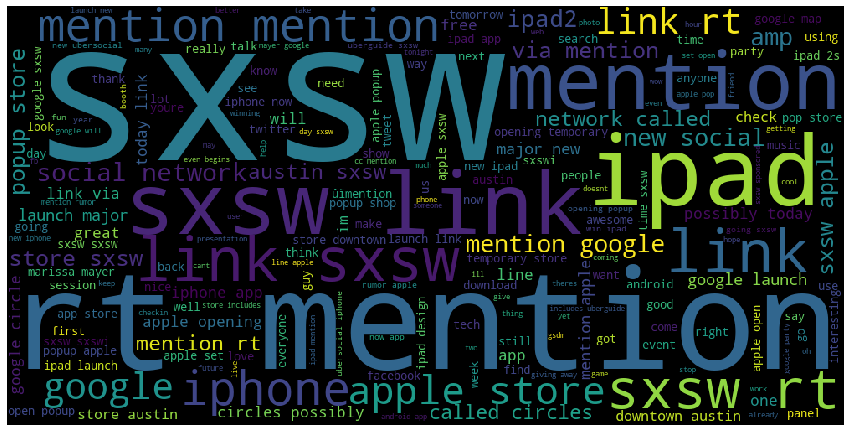

In [46]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(flatList)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [20]:
filtered_sentence = [w for w in flatList if not w in stop_words]
print(filtered_sentence)

['sxswnui', 'sxsw', 'apple', 'defining', 'language', 'touch', 'different', 'dialects', 'becoming', 'smaller', 'learning', 'ab', 'google', 'doodles', 'doodles', 'light', 'funny', 'amp', 'innovative', 'exceptions', 'significant', 'occasions', 'googledoodle', 'sxsw', 'one', 'inyourface', 'ex', 'stealing', 'show', 'yrs', 'rt', 'mention', 'quotat', 'sxsw', 'apple', 'schools', 'mkt', 'expertsquot', 'link', 'iphone', 'sxsw', 'app', 'would', 'b', 'pretty', 'awesome', 'didnt', 'crash', 'every', '10mins', 'extended', 'browsing', 'fuckit', 'illmakeitwork', 'line', 'outside', 'apple', 'store', 'austin', 'waiting', 'new', 'ipad', 'sxsw', 'link', 'technews', 'one', 'lone', 'dude', 'awaits', 'ipad', '2', 'appleûªs', 'sxsw', 'store', 'link', 'technews', 'apple', 'ipad2', 'sxsw', 'tablets', 'tech', 'sxsw', 'tips', 'prince', 'npr', 'videos', 'toy', 'shopping', 'zuckerberglink', 'sxsw', 'ipad', 'nu', 'user', 'rt', 'mention', 'new', 'ubersocial', 'iphone', 'app', 'store', 'includes', 'uberguide', 'sxsw', 

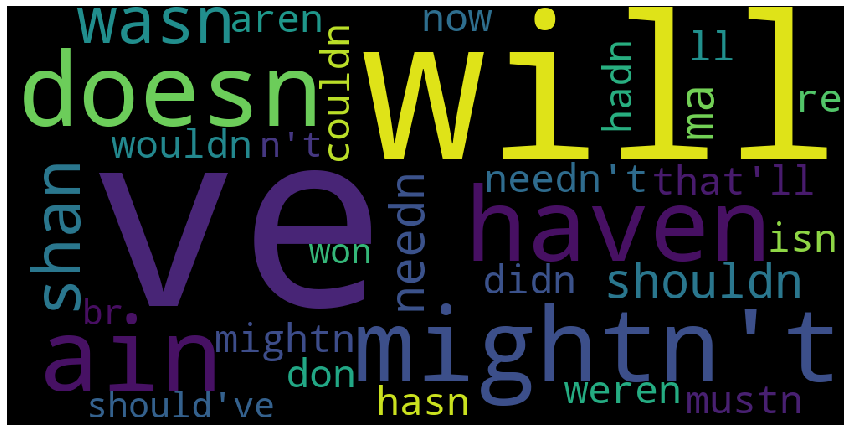

In [48]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(stop_words)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [22]:
len(filtered_sentence)

89723

In [23]:
# tokens is a list of all tokens in corpus
freq_dist = nltk.FreqDist(filtered_sentence)
freq_dist


FreqDist({'sxsw': 7508, 'mention': 5512, 'link': 3380, 'rt': 2344, 'ipad': 1911, 'google': 1860, 'apple': 1727, 'iphone': 1214, 'store': 1188, 'new': 862, ...})

In [24]:
key=freq_dist.keys()


In [ ]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

In [25]:
list_key=list(key)

In [26]:
first_20=list_key[:10]

In [27]:
last_20=list_key[-10:]

In [28]:
last_20

['visualisation',
 'plze',
 'tammi',
 'soooooo',
 'aha',
 'lactation',
 'quotmothers',
 'fin',
 'serv',
 'bankinnovate']

In [29]:
freq_dist['bankinnovate']

1

In [30]:
first_20

['sxswnui',
 'sxsw',
 'apple',
 'defining',
 'language',
 'touch',
 'different',
 'dialects',
 'becoming',
 'smaller']

In [74]:
res = [i + j for i, j in (first_20, last_20)] 


ValueError: too many values to unpack (expected 2)

In [75]:
res

['sxswnuivisualisation',
 'sxswplze',
 'appletammi',
 'definingsoooooo',
 'languageaha',
 'touchlactation',
 'differentquotmothers',
 'dialectsfin',
 'becomingserv',
 'smallerbankinnovate']

In [55]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(common)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

TypeError: sequence item 10: expected str instance, list found

In [31]:
len(freq_dist)

9870

In [32]:
final_list = list(set(filtered_sentence))
final_list
    

['guerrilla',
 'beauty',
 'vencorps',
 'moonshine',
 'courtyard',
 'money',
 'digitalluxury',
 'portable',
 'mighty',
 'apps',
 'vaccines',
 'sites',
 'gaga',
 'shoots',
 'aquent',
 'comparison',
 'jeopardy',
 'hoursquot',
 'build',
 'cw',
 'quotby',
 'resolved',
 'scifi',
 'partyawesome',
 'pov',
 'adoption',
 '200m',
 'icarradio',
 'enchanting',
 'broken',
 'ten',
 '11ntc',
 'leave',
 'regardless',
 '210',
 'carrie',
 'sitbyus',
 'reconsidering',
 'codes',
 'dealsquot',
 'donates',
 'epicquot',
 'recognition',
 'rush',
 'communicationsûª',
 'snuggie',
 'n22',
 'show',
 'invites',
 'h4cker',
 'officially',
 'puppy',
 'acrosse',
 'participate',
 '65quot',
 'definition',
 'dreaded',
 'nothing',
 'popupstores',
 'emotional',
 'augmentedreality',
 'words',
 'webber',
 'stay',
 'otherwise',
 'cisco',
 'crazyfest',
 'mcree',
 'marissagoogle',
 'previewing',
 'sw',
 'ish',
 'get',
 'facial',
 'almost',
 'quotdo',
 'sweater',
 'max',
 'midst',
 'exactly',
 'banged',
 'brisk',
 'offerings',
 '

In [33]:
len(final_list)

9870

In [34]:
finale = [w for w in final_list if not w in first_20]     


In [35]:
len(finale)

9860

In [36]:
finale_1=[w for w in finale if not w in last_20]

In [37]:
len(finale_1)

9850

In [76]:
type(finale_1)

list

In [42]:
nltk.pos_tag(finale_1)[:10]

[('guerrilla', 'NN'),
 ('beauty', 'NN'),
 ('vencorps', 'FW'),
 ('moonshine', 'NN'),
 ('courtyard', 'NN'),
 ('money', 'NN'),
 ('digitalluxury', 'NN'),
 ('portable', 'JJ'),
 ('mighty', 'NN'),
 ('apps', 'NN')]

In [38]:
pd.DataFrame(finale_1)

0
0         guerrilla
1            beauty
2          vencorps
3         moonshine
4         courtyard
5             money
6     digitalluxury
7          portable
8            mighty
9              apps
10         vaccines
11            sites
12             gaga
13           shoots
14           aquent
15       comparison
16         jeopardy
17        hoursquot
18            build
19               cw
20           quotby
21         resolved
22            scifi
23     partyawesome
24              pov
25         adoption
26             200m
27        icarradio
28       enchanting
29           broken
...             ...
9820         axsure
9821   interviewing
9822        awesome
9823  biggtgtgoogle
9824           dime
9825            bar
9826          budge
9827   embarrassing
9828            qho
9829         teases
9830         quotim
9831        passing
9832            mix
9833          looms
9834         badges
9835     protection
9836           salt
9837           phil
9838          style
9839         cicles
9840         static
9841         chance
9842      armadillo
9843      storequot
9844       wpacific
9845              u
9846         spoken
9847         pushio
9848            80s
9849          front

[9850 rows x 1 columns]

In [24]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(final_list)

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

wwwranaco
{'wwwranaco'}
owllove
{'owllove'}
larry
{'larry'}
windowsphone
{'windowsphone'}
pickmeupanipad2
{'pickmeupanipad2'}
comer
{'cometary', 'comer'}
galaxys4g
{'galaxys4g'}
setbacks
{'setbacks'}
ipad2û
{'ipad2û'}
normalpeople
{'normalpeople'}
quotfuture
{'quotfuture'}
ipadonly
{'ipadonly'}
networkingquot
{'networkingquot'}
1100am
{'1100am'}
propping
{'propping'}
citygoround
{'citygoround'}
caveats
{'caveats'}
hackingwork
{'hackingwork'}
kawasaki
{'kawasaki'}
sold-out
{'sold-out'}
meet
{'eetpu', 'setup', 'meetin', 'meets', 'meet', 'meatus'}
sxswsounds
{'sxswsounds'}
msusxsw
{'msusxsw'}
1045am3
{'1045am3'}
sash
{'sssh', 'sash', 'sesh', 'ssh', 'sshh'}
the
{'thus', 'bhs', 'rhs', "th'", 'thf', 'lhs', 'tbs', 'dhs', 'tho', 'thy', "t's", 'tes', 'tss', 'chs', 'thi', 'thos', 'ahs', 'tis', 'tls', 'tps', 'tvs', 'ehs', 'thu', 'this', 'tcs', 'thes', 'hs', 'tds', 'the', 'tas', 'thr', 'whs', 'ghs', 'th', 'vhs', 'tha', 'nhs', 'ts'}
nfcrfid
{'nfcrfid'}
quickcontact
{'quickcontact'}
coudbeeasier
{'c

marquess
{'marques', 'masques', 'marquess'}
a2b
{'a2b'}
11ntc
{'11ntc'}
view
{'viewer', 'views', 'viewed', 'view'}
pepsicostage
{'pepsicostage'}
interactivefilm
{'interactivefilm'}
spazmatics
{'spazmatics'}
burden
{'busmen', 'burden', 'bussed', 'bushes', 'busier', 'busied', 'gusev', 'bude', 'budded', 'bushed', 'buses', 'bused', 'buster', 'busses', 'busted', 'bushey', 'bushel', 'busies', 'husrev', 'busker'}
hashtags
{'hashtags'}
headachesquot
{'headachesquot'}
800115959p
{'800115959p'}
ûïspecialsû
{'ûïspecialsû'}
banksmoney
{'banksmoney'}
first-generation
{'first-generation'}
washable
{'washable'}
quotour
{'quotour'}
mindtouchers
{'mindtouchers'}
latinasintechû
{'latinasintechû'}
tech
{'techs', 'tech'}
mosaic
{'mosaics', 'mosaic'}
webs
{'webbs', 'webs'}
nonmacbook
{'nonmacbook'}
actionquot
{'actionquot'}
contentquot
{'contentquot'}
wlr
{'l/r', 'lcr', 'lar', 'wwr', 'lur', 'wlr', 'lnwr', 'lwp', 'nwr', 'ldr', 'lor', 'gwr', 'lwb', 'ltr', 'pwr', 'lwt', 'lsr', 'lr', 'wr', 'l-r', 'lw'}
version

ipaddesignheadaches
{'ipaddesignheadaches'}
quotgroupon
{'quotgroupon'}
fantastic
{'fantastic'}
binggoogle
{'binggoogle'}
miller
{'duller', 'driller', 'deller', 'miller', 'hiller', 'giller', 'killer', 'filler', 'tiller', 'ziller', 'dilley', 'piller'}
4squarequot
{'4squarequot'}
southbysouthwest
{'southbysouthwest'}
wwwskylinesnet
{'wwwskylinesnet'}
quotindustry
{'quotindustry'}
quotsteve
{'quotsteve'}
bassquot
{'bassquot'}
photos
{'photons', 'photos'}
iamagameshater
{'iamagameshater'}
allowingyou
{'allowingyou'}
donor
{'donat', 'donjon', 'conlon', 'donlan', 'donson', 'donor', "don't", 'donato', 'dont', 'dollop', 'dunlop', 'dilnot'}
mention
{'mention', 'mentions'}
square
{'square'}
quoted
{'quote', 'quoted', 'quotes', 'quoth', 'southey'}
screen
{'sheen', 'screen', 'schein', 'scheer'}
taptuquotapple
{'taptuquotapple'}
neediest
{'neediest'}
thewildernessdowntowncom
{'thewildernessdowntowncom'}
hardcore
{'hardcore'}
geekspringbreak
{'geekspringbreak'}
sussex
{'sussex'}
webbrowsing
{'webbro

likesquot
{'likesquot'}
tableware
{'tableware'}
missed
{'dished', 'kissed', 'disused', 'pissed', 'hissed', 'missed'}
stops
{'pitons', 'hips', 'tops', 'hits', 'hilltops', 'hops', 'hoops', 'hippos', 'stops'}
rulesquot
{'rulesquot'}
sxswsurvival
{'sxswsurvival'}
latham
{'latham', 'lata'}
webster
{'webster', 'pubmaster'}
n3
{'n=7', 'n3', 's37', 'g37', 'n7'}
catalogued
{'catalogued'}
sxswdad
{'sxswdad'}
quotmention
{'quotmention'}
salinas
{'salinas'}
mediamarketing
{'mediamarketing'}
brushstrokes
{'brushstrokes'}
internet
{'internet', 'internees'}
box
{'box', 'x-box'}
worklifeprogress
{'worklifeprogress'}
tcrncheb5fjs
{'tcrncheb5fjs'}
to
{'ton', 'toe', 'sto', 'ctos', 'ito', 'toa', 't5', 'pto', 'tow', 'tog', 'stow', 'atom', 'eton', 'to', 'stok', 'oto', 'mtoe', 'top', 'stop', 'ltom', 'tor', 'stoy', 'tot', 'atop', 'tod', 'btoe', 'tof', 'toc', 'too', 'stob', 'toi', 'tox', 'wto', 'vo5', 'tok', 'tol', 'bto', 'tom', 'itoh', 'rto', 'toy'}
apply
{'appn', 'appen', 'a11', 'ap1', 'apply', 'appy', 'appr

imrie
{'imrie'}
flashspecial
{'flashspecial'}
following
{'fulling', 'following'}
longford
{'long-form', 'longford'}
kiiiiiilling
{'kiiiiiilling'}
socialnews
{'socialnews'}
thisisdare
{'thisisdare'}
anvil
{'anvil', 'adil'}
pageant
{'palest', 'pageant'}
rowdy
{'howey', 'rowdy', 'dowdy'}
musicviz
{'musicviz'}
quotmistakes
{'quotmistakes'}
catphysics
{'catphysics'}
ajaxquot
{'ajaxquot'}
restraints
{'restraints'}
awkward
{'awkward', 'backward'}
popuitp
{'popuitp'}
teletubbie
{'teletubbie'}
windows
{'windows'}
youse
{'youse'}
essdub
{'essdub'}
grandad
{'grandad'}
lucy
{'lucy', 'lucas'}
quoits
{'quoits'}
quotpartyingquot
{'quotpartyingquot'}
imthetype
{'imthetype'}
11quot
{'11quot'}
sxsw500
{'sxsw500'}
rubens
{'rubens', 'reuben'}
nadia
{'nadia', 'nada'}
ipadformatted
{'ipadformatted'}
eight-bit
{'eight-bit'}
therocksreport
{'therocksreport'}
quotbetter
{'quotbetter'}
bigmistake
{'bigmistake'}
cliff
{'cli', 'cliff', 'clef', 'coif', 'clio', 'clift', 'clip', 'clit'}
arrive
{'arrive', 'arrigo'}
u

outlive
{'outlive'}
gamelayer
{'gamelayer'}
knowthats
{'knowthats'}
sxswiû
{'sxswiû'}
kinda
{'dorinda', 'kinda'}
gitchococktailon
{'gitchococktailon'}
sxswand
{'sxswand'}
hnwsxsw
{'hnwsxsw'}
reputationquot
{'reputationquot'}
socailmedia
{'socailmedia'}
peopleparty
{'peopleparty'}
remanded
{'remanded', 'unbranded', 'branded', 'rebounded', 'regranted'}
charmingintense
{'charmingintense'}
mishmash
{'mishmash'}
epicurus
{'epicurus'}
room
{'boom', 'zoom', 'loom', 'doom', 'room'}
willinclude
{'willinclude'}
pops
{'popes', 'opus', 'coups', 'pops', 'soups', 'pop-up', 'poppy', 'poppa', 'pomps', 'pups', 'hopps', 'pours', 'pogues', 'polyps', 'pouts', 'top-ups', 'populus', 'copps'}
aarpbulletin
{'aarpbulletin'}
booth
{'booth', 'hookah', 'loofah'}
shepherd
{'shepherd'}
like
{'like', 'alike', 'unlike'}
fuckyeah
{'fuckyeah'}
media
{'media', 'medial', 'median'}
does
{'soest', 'does', 'dent', 'dost', 'dont', 'dorset'}
bay
{'eay', 'bay', 'debay'}
cause
{'carse', 'caruso', 'cruse', 'cause'}
quotnarcissis

{'drunkwalrus'}
cmsxsw
{'cmsxsw'}
ceokidschat
{'ceokidschat'}
smarmcake
{'smarmcake'}
that
{'tholl', 'that', 'shall', 'hall', 'thatch', 'thrall', "that'", 'thrill', 'thals', 'tall', 'thats'}
corralling
{'corralling'}
someone
{'someone'}
randomactofkindness
{'randomactofkindness'}
coincidence
{'coincidence'}
storeagree
{'storeagree'}
snakehead
{'snakehead'}
industryquot
{'industryquot'}
uosxsw
{'uosxsw'}
far
{'alar', 'flay', 'lar', 'fear', 'flor', 'flax', 'flap', 'flag', 'flair', 'flaw', 'flan', 'flare', 'flam', 'fuar', 'clar', 'flab', 'flat', 'flak', 'fla', 'flr', 'flav', 'far'}
blow
{'bog', 'clog', 'log', 'slog', 'blot', 'blow', 'bloc', 'blob', 'blox', 'blok', 'blom', 'flog', 'blo'}
whiteboarding
{'whiteboarding'}
richpearson
{'richpearson'}
getting
{'getting', "gettin'"}
a
{'d', 'o', 't', 'x', 'l', 'a', 'r', 'v', 'q', 's', 'n', 'm', 'h', 'c', 'b', 'p', 'f', 'g', 'j', 'i', 'z', 'y', 'k', 'u', 'e', 'w'}
guys
{'guys'}
sandstorms
{'sandstorms'}
rocks
{'socks', 'stocks', 'shocks', 'frocks

¼ûäü
{'¼ûäü'}
tweeter
{'tweeter'}
contemplativequot
{'contemplativequot'}
amos
{'amos', 'ramos', 'samos'}
bolinsxsw
{'bolinsxsw'}
socialtypequot
{'socialtypequot'}
attendeesyou
{'attendeesyou'}
icarradio
{'icarradio'}
billed
{'lillee', 'billet', 'billie', 'billed'}
patrick
{'patrick'}
wwwadloopzcom
{'wwwadloopzcom'}
sxswsxsw
{'sxswsxsw'}
rigour
{'rigour', 'rigueur'}
david
{'david', 'vcid', 'rancid', 'acid', 'avid', 'bacci', 'avoid'}
cm
{'cm2', 'a48', 'cm/s', 'cmlr', 'cd68', 'cmr', 'c8', 'cr4', 'm45', 'cd4', 'cmea', 'cd45', 'cm.', 'cmd.', 'cmnd', 'am486', 'cms', 'cm3', 'cmv', 'c64', 'dm98', 'cml', 'cmrn', 'cmc', 'cd8', 'cd44', 'c4', 'cmh', 'm42', 'n=48', 'cm', 'cmw', 'm4', 'cb4', 'cp28', 'cma', 'cme', 'cmos', 'c49', 'cv8', 'cmht', 'cmi', 'cmg', 'cmj', 'm8', 'm40', 'p48', 'cmdr', 'cmsn'}
press
{'cress', 'undress', 'suppress', 'oppress', 'actress', 'depress', 'cypress', 'express', 'caress', 'press', 'empress', 'xpress', 'unipress', 'repress', 'impress'}
diegopacific
{'diegopacific'}
quota

phonecamera
{'phonecamera'}
revolutionquot
{'revolutionquot'}
am
{'ram', 'yam', 'nam', 'bam', 'cam', 'fam', 'kam', 'dam', 'mam', 'lam', 'am', 'zam', 'pam', 'sam', 'jam', 'ham', 'tam'}
magazinequot
{'magazinequot'}
plixicomp83323324
{'plixicomp83323324'}
dead
{'headed', 'daddy', 'dddd', 'dadd', 'beaded', 'dreaded', 'dadda', 'deadly', 'dead', 'leaded', 'deaden'}
punch-up
{'punch-up'}
smmnextgen
{'smmnextgen'}
webtrends
{'webtrends'}
front-end
{'front-end', 'fronted'}
filmfestepic
{'filmfestepic'}
these
{'these'}
circles
{'cycles', 'icicles', 'circles'}
sxswilink
{'sxswilink'}
hannah
{'hannah'}
want
{'tnt', 'w/t', 'fnt', 'cnt', 'wet', 'ent', 'wot', 'wont', 'want', 'ant', 'int', 'wat', 'went', 'wtn', 'nt', 'wn', 'wt', 'wit'}
nonapple
{'nonapple'}
blogpost
{'blogpost'}
audioboo
{'audioboo'}
conflictquot
{'conflictquot'}
indysaha
{'indysaha'}
rtûïmention
{'rtûïmention'}
iampaintedface
{'iampaintedface'}
austinbergstrom
{'austinbergstrom'}
appleshare
{'appleshare'}
geddit
{'geddit', 'reddin'}

{'booksconferences'}
payroll
{'pascall', 'payroll', 'mayall'}
possum
{'possum'}
spiderhouse
{'spiderhouse'}
of
{'n4', 'd3', 'ic', 'rb', 's2', 'ps', "a'", 'ua', 'yz', 'nk', 'c8', 'ol', 'iu', 'wn', 'c2', 'c5', 'km', 'lw', 'b-', 'jc', 'tc', 'cb', 'kt', 'hh', 'je', 'gm', 'nn', 'dd', 'di', 'gi', 'jm', 'mh', 'eq', "e'", "t'", 'fs', 'g7', 'k3', 'a-', 't=', 'ji', 'uf', 'kl', 'ia', 'd', 'hn', 'br', 'bx', 'qu', 'mb', 'or', 'hc', 'rx', 'hd', 'on', 'rv', 'to', 'xm', 'pe', 'sd', 'n5', 'b4', 'sk', 'bb', 'oa', 'nh', 'e5', 'ar', 'bo', 'jj', 'pn', 'eh', 'xi', 'yn', 'om', 'f6', 'r6', 'sa', 'k4', 'i1', 'ii', 'v2', 'jb', 'fe', 'mj', 't4', 'g2', 'g4', 'y', 'q2', 'ti', 'al', 's0', 'lr', 'er', 'md', 'js', 'bl', 'sj', 'xu', 'pm', 'ae', 'ng', 'pt', 'gd', 'bv', 'm0', 'mw', 'l', 'lv', 'xl', 'xr', 'qd', 'g1', 'tv', 'r', 'kd', 'pp', 'dn', 't9', 'lb', 'vs', 'cc', 'tp', 'pu', 'og', 'qc', 'ek', 'rl', 'd-', 'do', 'bu', 'y-', 'kf', 'cm', 'li', 'ow', 'yo', 'nd', 'z3', "d'", 'dz', 'f', 'fn', 'ny', 'p4', 'mz', 'w1', 'lm',

wwwtokiicom
{'wwwtokiicom'}
socialflow
{'socialflow'}
eads
{'eads'}
m40
{'e40', 'v40', 'p40', 'f40', 'a40', 's40', 'm40', 'g40', 'b40', 'z80'}
glowinthedark
{'glowinthedark'}
quotcab4mequot
{'quotcab4mequot'}
sundayswaggereventbritecom
{'sundayswaggereventbritecom'}
ltd
{'ltc', 'lte', 'at1', 'l12', 'sw10', 'a210', 'l1', 'gt40', 'lts', 'ltp', 'ltq', 'lw60', 'd10', 'x10', 'a610', 'p10', 'ld50', 's10', 'r10', 'lm100', 'ltd', 'v10', 'lta', 'dn10', 'nw10', 'n=10', 's.10', 'ltom', 'ltb', 'm10', 'ry10', 'g10', 'bt1', 'gt1x', 'a10', 't160', 't1', 'ltr', 'lt.', 'ltd.', 'ltte', 'f10', 'b10', 'lm1', 'vc10', 'lt'}
ipaddesigning
{'ipaddesigning'}
trueexpect
{'trueexpect'}
am
{'ram', 'yam', 'nam', 'bam', 'cam', 'fam', 'kam', 'dam', 'mam', 'lam', 'am', 'zam', 'pam', 'sam', 'jam', 'ham', 'tam'}
not
{'snot', 'knot', 'not'}
foodspotting
{'foodspotting'}
steampunk
{'steampunk'}
quotworst
{'quotworst'}
cloudkick
{'cloudkick'}
sxswfilm
{'sxswfilm'}
ketchup
{'ketchup', 'ketch'}
ssds
{'sssh', 'ssrs', 'ssds',

googledoodle
{'googledoodle'}
aware
{'aware', 'mare', 'vmark', 'ware', 'beware'}
writing
{"writin'", 'writing'}
leanstartup
{'leanstartup'}
webpronews
{'webpronews'}
plaza
{'banzai', 'plaza', 'panza', 'planar', 'plantain', 'plazas'}
berkley
{'berkley'}
quotflashquot
{'quotflashquot'}
bitlyandroidhig
{'bitlyandroidhig'}
reckon
{'reckon', 'brecon', 'redon', 'recor'}
wwwzaggleorg
{'wwwzaggleorg'}
drafter
{'drafter', 'rafter'}
freespeech
{'freespeech'}
quottripquot
{'quottripquot'}
numb
{'nab', 'nrpb', 'neb', 'nob', 'numb', 'ntb', 'ncb', 'nb', 'ntsb', 'nib', 'ndb', 'nub'}
webidentity
{'webidentity'}
highrise
{'highrise', 'highwire', 'highline'}
girlcrush
{'girlcrush'}
allthingsd
{'allthingsd'}
googledoodles
{'googledoodles'}
podcasters
{'podcasters'}
youûplease
{'youûplease'}
smcdallas
{'smcdallas'}
dorkinout
{'dorkinout'}
quotipad
{'quotipad'}
gthttpbitlyaxzwxb
{'gthttpbitlyaxzwxb'}
ballroom
{'ballrooms', 'ballroom'}
todayfeels
{'todayfeels'}
gorillas
{'gorillas', 'wallas'}
shuffleboard
{

quotoquot
{'quotoquot'}
showbiz
{'showbiz', 'sorbie', 'scobie', 'socio'}
rid
{'rid', 'frud', 'arid', 'farid', 'fred', 'fried', 'fri', 'grid', 'frida'}
whole
{'whore', 'hove', 'shove', 'whole', 'wove', 'whose'}
friction
{'fricker', 'friction', 'brickie', 'rickie', 'firkin', 'rifkin', 'pickin', 'flicking', 'fricke', 'frisking', 'pricking', 'frick', 'tricking'}
of
{'n4', 'd3', 'ic', 'rb', 's2', "a'", 'ps', 'ua', 'yz', 'nk', 'ol', 'c8', 'iu', 'wn', 'c2', 'c5', 'km', 'b-', 'jc', 'tc', 'cb', 'kt', 'hh', 'je', 'gm', 'nn', 'dd', 'di', 'gi', 'jm', 'mh', 'eq', "e'", "t'", 'fs', 'g7', 'k3', 'a-', 'ji', 't=', 'uf', 'kl', 'ia', 'd', 'hn', 'br', 'bx', 'qu', 'or', 'mb', 'hc', 'rx', 'hd', 'on', 'rv', 'to', 'xm', 'sd', 'n5', 'pe', 'b4', 'sk', 'bb', 'oa', 'nh', 'e5', 'ar', 'bo', 'jj', 'pn', 'yn', 'eh', 'xi', 'om', 'f6', 'r6', 'sa', 'k4', 'i1', 'ii', 'v2', 'jb', 'fe', 'mj', 't4', 'g2', 'g4', 'y', 'q2', 'ti', 'al', 's0', 'lr', 'er', 'md', 'js', 'bl', 'sj', 'xu', 'pm', 'ng', 'ae', 'pt', 'gd', 'mw', 'l', 'm

sweepstake
{'sweepstake'}
ios
{'ios'}
too
{'modo', 'tordo', 'toto', 'to-do', 'toro', 'topo', 'too', 'tono', 'todi', 'todd', 'togo', 'tod', 'todor', 'dodo', 'tomo', 'rodo', 'odo', 'bodo'}
self-respecting
{'self-respecting'}
7pmmeet
{'7pmmeet'}
marissamayer
{'marissamayer'}
snub
{'suor', 'stupor', 'lubor', 'sobor', 'snubs', 'snub'}
jamie
{'amin', 'jamil', 'jamie'}
notatsxsw
{'notatsxsw'}
getting
{'getting'}
wavebands
{'wavebands'}
nonsxswi
{'nonsxswi'}
posterousevents
{'posterousevents'}
fridayipad
{'fridayipad'}
sandstorm
{'sandstorm'}
onetime
{'onetime'}
geekdilemma
{'geekdilemma'}
epicentre
{'epicentre'}
vendors
{'vendors', 'encores'}
thing
{'aping', 'thing', 'aching', 'aging', 'ching', 'axing'}
steeple
{'steeple'}
technicalquot
{'technicalquot'}
60secondcrush
{'60secondcrush'}
quotwhats
{'quotwhats'}
ipadtoday
{'ipadtoday'}
fringe
{'rigger', 'frogmen', "friggin'", 'fridge', 'frigging', 'fringe', 'wiggen', 'fridges', 'trigger', 'fringed', 'rigged', 'origen', 'frighten', 'fringes', 'fe

ask
{'yak', 'm5', 'lok', 'nk', 'esk', 'c5', 'mak', 'h5', 'puk', 'ink', 'p15', 'pik', 'spk', 'ok', 'hvk', 'a55', 'sik', 'usk', 'lpk', 'pbk', 'b52', 'tok', 'k', 'm53', 'p53', 'rok', 'oik', 'atk', 'sok', 'u.k', 'b5', 't5', 'elk', 'p57', 'x15', 'g5', 'dpk', 'vuk', 'd5', 'p5', 's15', 'ak', 'n5', 'wok', 'sk', 'auk', 'oak', 'f5', 'e5', 'hk', 'm50', 'p50', 'pkk', 'hck', 'r5', 'fk', 'muk', 'yek', 'jfk', 'mk', 'bmk', 'cck', 'tek', 'lik', 'ask', 'eck', 'tk', 'r151', 'yuk', 'ek', 'rk', 'mek', 'wyk', 'w5', 'lek', 'nik', 'ilk', 'ck', 'ock', 'm15', 'p54', 'vbk', 'l5', 'r54', 'dk', 'ifk', 'pk', 's57', 'dik', 'uk', 'sbk', 'a5', 'rik', 'kk', 'hbk', 'sek', 'ctk', 'b15', 'tsk', 'p51', 'aek', 'ack', 'dak', 'kkk', 's5', 'dmk', 'ark', 'cuk', 'r15', 'pfk', 'k1', 'krk', 'p58', 'kok', 'sdk', 'm56', 'rsk', 'bk', 'pak', 'bok', 'zak', 'tak'}
prey
{'prem', 'rev', 'grev', 'pre', 'trev', 'prv', 'pre-', 'pres', 'prep', 'prey'}
rumoured
{'rumoured'}
ltandroidor
{'ltandroidor'}
quottopicality
{'quottopicality'}
hollergr

gadgetenvy
{'gadgetenvy'}
quote
{'quote'}
cos
{'nss', 'ccs', 'iss', 'csps', 'cse', 'cso', 'cs+', 'cuss', 'kss', 'cses', 'csd', 'cys', 'cps', 'mss', 'csr', 'chs', 'tss', 'cvs', 'cis', 'scs', 'pss', 'csu', 'cms', 'csa', 'cst', 'cbs', 'cssu', 'cns', 'cds', 'csi', 'c2s', 'csys', 'ces', 'csf', 'cws', 'cas', 'ass', 'uss', 'cos', 'hss', 'cass', 'bss', 'dss', 'ss', 'csp', 'oss', 'cls', 'cfs', 'csc', 'rss', 'crs', 'ess', 'csj', 'csm', 'cess', "c's", 'cs', 'cts'}
nutshell
{'nostell', 'nutshell'}
jasminder
{'jasminder'}
yahoocom
{'yahoocom'}
du
{'ddu', 'ecu', 'edp', 'vdu', 'edd', 'cdu', 'edo', 'edf', 'emu', 'ed', 'eau', 'ede', 'edi', 'eu', 'ebu', 'edn', 'ed.', 'epu', 'edfu', 'idu', 'du', 'edt', 'eds', 'kdu', 'mdu', 'bedu', 'edc', 'eda', 'ledu'}
analyticsexcelbuzzmetrics
{'analyticsexcelbuzzmetrics'}
is
{'ids', 'ps', 'rcs', 'ncs', 'yts', 'mgs', 'bbs', 'lfs', 'ngs', "z's", 'rps', 'kos', 'fus', 'hus', 'lus', 'aas', 'cos', 'tas', 'dms', 'nes', 'frs', 'ors', 'pos', 'fs', 'ees', "c's", 'c02', 'abs', 'y

httpbitlyetsbzk
{'httpbitlyetsbzk'}
kirkuk
{'kirkup', 'kirkuk', 'kirks'}
tcrnchfcs45j
{'tcrnchfcs45j'}
twinning
{'twinning'}
quotcirclesquot
{'quotcirclesquot'}
papal
{'papal'}
doucheput
{'doucheput'}
butgoogle
{'butgoogle'}
androidsxsw
{'androidsxsw'}
nfcquot
{'nfcquot'}
uselessobservations
{'uselessobservations'}
lonelyboy15
{'lonelyboy15'}
quotable
{'quotable'}
quotfeatured
{'quotfeatured'}
beardstext
{'beardstext'}
newapplestoreaustin
{'newapplestoreaustin'}
killerhack
{'killerhack'}
morefunpeoplewatching
{'morefunpeoplewatching'}
show
{'sbs', 'ssl', 'srsp', 'ssp', 'adsw', 'sgs', 'stow', 'scs', 'stew', 'skew', 'lsw', 'ssb', 'sssh', 'ssd', 'sms', 'saws', 'srs', 'susa', 'sx', 'ssi', 'psw', 'sw1w', 'sesh', 'sys', 'sews', 'ssc', 'snow', 'sash', 'suss', 'msw', 'sasp', 'suso', "s's", 'scfw', 'xs', 'ssm', 'spew', 'sssi', 'ssa', 'susy', 'ssh', 'sew', 's-s', 'sows', 'sese', 'scse', 'scsi', 'asw', 'zxs', 'syse', 'sts', 'ses', 'sps', 'sesa', 'slow', 'basw', 'sns', 'spsg', 'sow', 'slew', 'sgsa

inside out
{'inside-out', 'inside out'}
nowûòand
{'nowûòand'}
dig
{'dig', 'bigg', 'rigg', 'ding', 'digs', 'nigg', 'wigg', 'igg', 'eigg', 'diggs'}
quotsocialquot
{'quotsocialquot'}
a
{'d', 'o', 't', 'x', 'l', 'a', 'r', 'v', 'q', 's', 'n', 'm', 'h', 'c', 'b', 'p', 'f', 'g', 'j', 'i', 'z', 'y', 'k', 'u', 'e', 'w'}
ipadsquot
{'ipadsquot'}
mktgmoment
{'mktgmoment'}
foxton
{'foxton'}
tumble
{'tumble', 'tumbler'}
contextclues
{'contextclues'}
quotchallenge
{'quotchallenge'}
pelicans
{'medicals', 'pelicans'}
gustave
{'musgrave', 'gustave'}
map
{'mba', 'kbp', 'mbc', 'mdp', 'mb', 'mbq', 'mop', 'mmp', 'tbp', 'm-p', 'mnp', 'mbe', 'map', 'ubp', 'mbs', 'msp', 'bmp', 'mp', 'bp', 'mbo', 'mpp', 'mgp', 'mbv', 'mup', 'mbi', 'mbb', 'm.p', 'mep', 'mrp', 'mcp', 'mlp', 'gbp'}
twitterpower
{'twitterpower'}
sw1x
{'sw1x'}
sxsweisner
{'sxsweisner'}
reasons
{'newsons', 'kitsons', 'westons', 'persons', 'jepson', 'easons', 'watsons', 'jansons', 'stetsons', 'jewson', 'bensons', 'mesons', 'reasons', 'jevons', 'jemson

openingapple
{'openingapple'}
quothaving
{'quothaving'}
off
{'biff', 'bfv', 'pff', 'uff', 'bfg', 'buff', 'buf', 'bnf', 'bfa', 'baf', 'off', 'iff', 'bfs', 'bcf', 'bfi', 'bf', 'gff', 'aff', 'ff', 'bfd', 'bfgf', 'bef'}
imitated
{'uninitiated', 'imitated'}
smileyparty
{'smileyparty'}
speech
{'notch', 'tech', 'speech', 'natch', 'hotech'}
tip
{'tippy', 'top-10', 'tips', 'tap1', 'tipsy', 'tip', 'ip1', 'tipo', 'tipss', 'p10'}
quotsecretquot
{'quotsecretquot'}
big
{'bid', 'ibj', 'bip', 'bio', 'bj', 'bis', 'bin', 'bib', 'bir', 'bic', 'big', 'biz', 'bil', 'bie', 'bim', 'bit', 'bmj', 'ij', 'bi', 'lij'}
ooh
{'koc', 'aoc', 'otc', 'ioc', 'onc', 'soc', 'roc', 'ooh', 'hoc', 'oop', 'oor', 'oc', 'doc', 'loc', 'boc', 'eoc', 'ooo', 'toc', 'poc', 'oot', 'oo', 'orc'}
layer
{'layer', 'layard', 'nayar', 'lazar', 'lamar'}
during
{'ducking', 'duping', 'during', 'puking', 'dunking'}
ain
{'icn', 'aion', 'aic', 'ain'}
big
{'rmg', 'bcg', 'hug', 'a/g', 'ttg', 'dog', 'spg', 'meg', 'jog', 'zog', 'rog', 'seg', 'gig', 'b

superhappydevhouse
{'superhappydevhouse'}
quotwrongquot
{'quotwrongquot'}
win
{'wiv', 'wri', 'wix', 'wei', 'wid', 'dii', 'wis', 'mii', 'nii', "wi'", 'lii', 'wir', 'whi', 'sii', 'wil', 'wig', 'win', 'wwii', 'fii', 'wiz', 'iii', 'ii', 'vii', 'wie', 'wai', 'xii', 'wim', 'wi', 'cii', 'wit'}
checkingout
{'checkingout'}
sql
{'s83', 'sql', 'esq.', 's33', 'st3', 'sq', 'sw3', 's13', 's.3', 'sq.', 's3', 's23', 'ls23', 'sm3', 'sh3', 'sqr', 'esq', 'gs3', 'sqn', 'q3'}
joepieee
{'joepieee'}
mp
{'vp3', 'm3', 'pp3', 'mg3', 'p3', 'mpx', 'mp.', 'mpo', 'mp1', 'mpe', 'mpm', 'mpd', 'mp', 'mpp', 'rp3', 'mpl', 'mps', 'm13', 'mpg', 'm23', 'm53', 'mpc', 'mpr', 'mph'}
on
{'ora', 'one', 'nona', 'ova', 'dna', 'onc', 'ond', 'ofa', 'ono', 'on', 'oca', 'dona', 'una', 'bona', 'iona', 'ony', 'zona', 'oa', 'lna', 'ina', 'ana', 'rona', 'na', 'mona', 'bna', 'yona', 'sna', 'ons', 'ola', 'ena', 'oan', 'rna', 'ong', 'gna', 'oda', 'jna'}
afternoon
{'afternoon'}
quote
{'quote', 'quare', 'butare', 'quatre', 'quotable', 'quota'

mention
{'mention'}
verifone
{'verifone'}
what
{'wham', 'wha', 'what'}
arguing
{'arguing', 'aquino'}
wimp
{'wincup', 'wimp', 'winant', 'winans', 'dinamo'}
idontbelieve
{'idontbelieve'}
swissmade
{'swissmade'}
recs
{'recs', 'cecos', 'repos', 'pecos', 'recor'}
shouldshouldnt
{'shouldshouldnt'}
quotknow
{'quotknow'}
sxswåêlink
{'sxswåêlink'}
prey
{'prem', 'pre', 'perez', 'pre-', 'pres', 'preez', 'prep', 'prey'}
operaquot
{'operaquot'}
nor
{'ner', 'nar', 'npl', 'nr', 'npt', 'npv', 'nir', 'nps', 'ntr', 'nur', 'nrp', 'nsr', 'np', 'nprc', 'bpr', 'nor', 'nwr', 'nkr', 'npg', 'ncr', 'qpr', 'ipr', 'fpr', 'dpr', 'rpr', 'hpr', 'nmr', 'epr', 'cpr', 'npa', 'npc', 'ppr', 'npp', 'apr', 'spr', 'pr', 'mpr', 'ncpr'}
modem
{'idem', 'modem'}
farooq
{'farooq'}
morningquot
{'morningquot'}
turnbyturn
{'turnbyturn'}
themostistcom
{'themostistcom'}
shhh
{'shhh', 'ahhhh', 'ohhhh'}
debut
{'debut'}
schemassxsw
{'schemassxsw'}
internetonlinewebsitecom
{'internetonlinewebsitecom'}
seenocreepy
{'seenocreepy'}
ontology

microformats
{'microformats'}
keepaustinweird
{'keepaustinweird'}
quotlike
{'quotlike'}
user
{'ussr', 'tsar', 'user', 'usaf', 'sar', 'usair', 'usa', 'umar', 'usa.'}
sign
{'sigue', 'signed', 'sigua', 'sinus', 'sign', 'signet', 'signer', 'signs', 'signor', 'sigarup', 'signy', 'signal', 'sidcup', 'signe'}
folio
{'folios', 'folio'}
chilling
{'chilling', 'chillim', 'cuillin', 'chilli', 'chillis'}
n1
{'a12', 'r12', 'n=2', 'l12', 'd12', 's12', 'n1', 'b12', 'n2', 'sn12', 'v12', 'm12', 'no2', 'n=12', 'w12'}
googlequot
{'googlequot'}
sxswk
{'sxswk'}
morphine
{'morphic', 'morphia', 'morphine'}
chattingtexting
{'chattingtexting'}
godot
{'godot'}
frostbite
{'frostbite', 'fretwire'}
ubersocial
{'ubersocial'}
openexhibits
{'openexhibits'}
quotbut
{'quotbut'}
crowdsourcing
{'crowdsourcing'}
ask
{'yak', 'lok', 'nk', 'esk', 'mak', 'p300', 'puk', 'ink', 'pik', 'spk', 'ok', 'hvk', 'sik', 'usk', 'lpk', 'pbk', 'tok', 'k3', 'k', 'rok', 'oik', 'c02', 'atk', 'sok', 'u.k', 'elk', 'dpk', 'vuk', 'ak', 'wok', 'sk'

happydance
{'happydance'}
quotcreativityquot
{'quotcreativityquot'}
archforhumanity
{'archforhumanity'}
am
{'ram', 'yam', 'nam', 'bam', 'cam', 'fam', 'kam', 'dam', 'mam', 'lam', 'am', 'zam', 'pam', 'sam', 'jam', 'ham', 'tam'}
think
{'tiling', 'blink', 'tink', 'clink', 'slink', 'think', 'link'}
room6ab
{'room6ab'}
adelefiona
{'adelefiona'}
letschangetheworld
{'letschangetheworld'}
plc
{'ltc', 'lac', 'luc', 'lbc', 'lcc', 'll', 'lec', 'll.', 'lgc', 'tlc', 'glc', 'plc', 'lc', 'lhc', 'dlc', 'lmc', 'loc', 'llb', 'llp', 'l-c', 'lld', 'mlc', 'lelc', 'ldc', 'lrc'}
smiles
{'smiles', 'mules'}
attempt
{'tamp', 'adapt', 'stamps', 'tampa', 'stampa', 'attempt', 'tempt', 'stamp'}
z2
{'s20', 'p20', 'h20', 'z2', 'r20', 'm20', 'z80'}
quoted
{'quote', 'quoted', 'quotes', 'quota', 'quoth', 'quotas', 'quimby'}
sw15
{'sw15'}
anywhereuntil
{'anywhereuntil'}
wildquot
{'wildquot'}
orderedmidway
{'orderedmidway'}
routearound
{'routearound'}
webb
{'webb', 'web', 'webs'}
foodspottings
{'foodspottings'}
gdgtaustin


wssxsw
{'wssxsw'}
badgepicture
{'badgepicture'}
screenshot
{'screenshot'}
coveragesxsw
{'coveragesxsw'}
conventioncenter
{'conventioncenter'}
quotgive
{'quotgive'}
quota
{'quotas', 'quota'}
r3conf1gur3d
{'r3conf1gur3d'}
livetweeting
{'livetweeting'}
this
{'this'}
bythepool
{'bythepool'}
computerquot
{'computerquot'}
partygood
{'partygood'}
quotlotta
{'quotlotta'}
gout
{'godot', 'goult', 'gout'}
infant
{'ingot', 'in/out', 'infest', 'infact', 'infant', 'infonet', 'info', 'infect', 'inmost', 'inform', 'info.'}
do-it-yourself
{'do-it-yourself'}
quotable
{'quotable'}
ûhoboûª
{'ûhoboûª'}
thingquot
{'thingquot'}
zaarlyiscoming
{'zaarlyiscoming'}
iosdevices
{'iosdevices'}
buzzquot
{'buzzquot'}
euro
{'miro', 'euro', 'puro', 'munro', 'murdo', 'mur', 'murk', 'muso', 'moro', 'mauro'}
marketer
{'marketer'}
quottransparency
{'quottransparency'}
goodlet
{'goodlet'}
coolgoofy
{'coolgoofy'}
shirt
{'thirt', 'shirt', 't-shirt'}
fbi
{'fpi', 'fei', 'fdi', 'fi', 'fy', 'fym', 'fmi', 'fai', 'fii', 'fbi', 'fki

quottheyre
{'quottheyre'}
enoughquot
{'enoughquot'}
fightthepaddle
{'fightthepaddle'}
macworld
{'macworld'}
a
{'d', 'o', 't', 'x', 'l', 'a', 'r', 'v', 'q', 's', 'n', 'm', 'h', 'c', 'b', 'p', 'f', 'g', 'j', 'i', 'z', 'y', 'k', 'u', 'e', 'w'}
happensxsw
{'happensxsw'}
at
{'ax', 'at1', 'ata', 'tx', 'atc', 'aix', 'ttx', 'atb', 'gtx', 'att', 'atn', 'ftx', 'atm', 'at3', 'atg', 'a-x', 'tax', 'ati', 'a3x', 'atv', 'at2', 'at', 'ate', 'aux', 'at.', 'atp', 'ats', 'ath', 'atk'}
agent
{'aunt', 'quest', 'ascent', 'quett', 'sequent', 'aquino', 'ardent', 'squint', 'advent', 'agent', 'absent', 'fluent', 'quint', 'accent', 'quant', 'assent', 'argent'}
latium
{'latium'}
swesxsw
{'swesxsw'}
schedulestheir
{'schedulestheir'}
veto
{'evo', 'veto', 'vero', 'vivo'}
lover
{'lowther', 'lover', 'loehr', 'lovelier'}
eventprofs
{'eventprofs'}
powerglove
{'powerglove'}
twitternext
{'twitternext'}
quotdrink
{'quotdrink'}
quatrains
{'quatrains'}
noah
{'woh', 'noah', 'woad', 'woan', 'wah'}
livesteam
{'livesteam'}
macsq

jordanhill
{'jordanhill'}
geekfest
{'geekfest'}
ihearnetwork
{'ihearnetwork'}
concert-goers
{'concert-goers'}
likes
{'likes', 'pikes', 'bikes', 'mikes', 'dikes', 'hikes', 'sikes', 'yokes'}
row
{'ww', 'rmw', 'rw', 'tww', 'raw', 'nww', 'aww', 'rwc', 'row'}
dizzy
{'tizzy', 'dizzy', 'buzzy', 'izzy', 'lizzy', 'fizzy'}
storymeaning
{'storymeaning'}
are
{'ara', 'asw', 'aru', 'arm', 'arf', 'ars', 'arc', 'drw', 'alw', 'aw', 'rw', 'aww', 'a.w', 'arp', 'are', 'ar', 'ark', 'ari', 'arg', 'art', 'arr', 'trw', 'raw'}
successful
{'successful'}
miriam
{'miriam', 'irian', 'priam'}
wwwsocialmediabumtumblrcom
{'wwwsocialmediabumtumblrcom'}
downtownquot
{'downtownquot'}
bestappever
{'bestappever'}
outcast
{'outcast', 'outlast'}
day
{'day'}
c2
{'c2s', 'c2', 'c=3', 'p23', 'cd3', 'cm3', 'a23', 'm23', 's23', 'c3'}
context
{'context'}
in case
{'encase', 'incas', 'in case'}
worldquot
{'worldquot'}
quotsocial
{'quotsocial'}
of
{'n4', 'd3', 'ic', 'rb', 's2', "a'", 'ps', 'ua', 'yz', 'nk', 'c8', 'ol', 'iu', 'wn', 'c

davis
{'satis', 'smuts', 'sais', 'elvis', 'devis', 'hmis', 'nevis', 'svqs', 'amis', 'smit', 'mavis', 'solis', 'vis', 'mis', 'levis', 'smail', 'avis', 'savin', 'mais', 'bovis', 'hovis', 'mvs', 'sms', 'semis', 'sufis', 'divis', 'bevis', 'saris', 'spivs', 'davis', 'sssis', 'pmis', 'skis', 'smrs', 'sis', 'smogs', 'wyvis', 'sims', 'saves', 'suis', 'smes'}
geosocial
{'geosocial'}
relocation
{'relocation', 're-location'}
padlock
{'padlock'}
tweetdeck
{'tweetdeck'}
showusyouricrazy
{'showusyouricrazy'}
webster
{'webster', 'websters'}
inyourface
{'inyourface'}
arab
{'grab', 'ahab', 'dab', 'moab', 'drab', 'tab', 'chab', 'saab', 'mab', 'ccab', 'nab', 'cab', 'fab', 'jab', 'stab', 'bab', 'lab', 'rab', 'crab', 'flab', 'e2a', 'arab', 'slab', 'zab', 'swab', 'a2b', 'ab', 'raab', 'gab', 'oab', 'scab'}
quotcheck
{'quotcheck'}
tsunamithe
{'tsunamithe'}
ms
{'ams', 'kms', 'zxs', 'rms', 'ems', 'nms', 'zds', "z's", 'cms', 'vms', 'hms', 'fms', 'bms', 'sms', 'ums', 'dms', 'pms', 'zbs', 'gms', 'lms', 'ims', 'ms'

6thcongress
{'6thcongress'}
zazzlesxsw
{'zazzlesxsw'}
urthotscom
{'urthotscom'}
khan
{'kwan', 'khan', 'kean', 'xan', 'klan', 'kan', 'kuan'}
ipadperson
{'ipadperson'}
digitalblasphemy
{'digitalblasphemy'}
debbie
{'herbie', 'debbie', 'begbie', 'newe', 'nettie', 'kelbie', 'newi', 'ebbie', 'nesbit', 'nessie', 'newbon', 'nellie', 'newby', 'nebe'}
cover
{'cov', 'cover', 'cour', 'cove', 'cvr', 'coir', 'corr', 'cor'}
quotmapping
{'quotmapping'}
typing
{'hyping', 'typing'}
linear
{'lanier', 'linear', 'loncar', 'lancer', 'lunar', 'langer', 'lanka', 'langur', 'anwar', 'lantau', 'landau', 'lascar', 'lanark', 'lantra', 'lana', 'lazar', 'hangar', 'lanham', 'landor', 'ladhar', 'lander', 'lanyard', 'lamar', 'bandar', 'planar', 'lannah', 'langan', 'lankan', 'mannar'}
wowltltûïmention
{'wowltltûïmention'}
dayearthquake
{'dayearthquake'}
activation
{'activation'}
jambon
{'jambon'}
bitlyajs2011
{'bitlyajs2011'}
pm
{'udpm', 'rpm', 'spm', 'capm', 'pm', 'tpm', 'ipm', 'cpm', 'mpm', 'ppm', 'ccpm', 'wpm', 'bpm'

laurieshook
{'laurieshook'}
mueller
{'beller', 'mueller', 'buller'}
techsavvy
{'techsavvy'}
corporatewhore
{'corporatewhore'}
mobilesearch
{'mobilesearch'}
catfightquot
{'catfightquot'}
compress
{'oppress', 'compress'}
oooorkut
{'oooorkut'}
clevelandsteamer
{'clevelandsteamer'}
thosequot
{'thosequot'}
weekend
{'weekend'}
httptco26svo3m
{'httptco26svo3m'}
chzbrgr
{'chzbrgr'}
jade
{'nadi', 'madi', 'jedi', 'jade', 'hadi', 'judi', 'jodi', 'jaci', 'kadi', 'padi', 'jai', 'adi', 'wadi'}
betterquot
{'betterquot'}
richdeep
{'richdeep'}
bettercloud
{'bettercloud'}
hiringquot
{'hiringquot'}
truestory
{'truestory'}
wikimedia
{'wikimedia'}
iphoneapp
{'iphoneapp'}
successquotmention
{'successquotmention'}
heart-rate
{'heart-rate'}
offside
{'offside', 'off-site'}
real-estate
{'real-estate'}
outright
{'outright'}
obe
{'ob', 'obs', 'mbv', 'dbv', 'ov', 'obe', 'bv', 'hbv', 'opv'}
and
{'asp', 'ads', 'asw', 'hsd', 'bsd', 'csd', 'asda', 'psd', 'asi', 'as', 'ask', 'sd', 'a-d', 'asm', 'aid', 'asv', 'add', 'ss

In [34]:
common=[]
values=freq_dist.values()
value=list(values)
type(value)
value[0]

4

In [38]:
len(value)

9870

In [36]:
for i in range(value):
    if value[i]<500 & value[i]>20:
        common.append(i)

[0,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 30,
 31,
 32,
 33,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 53,
 56,
 57,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 175,
 177,
 178,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 1

Lemmatization

In [33]:
#initialise word lematizer
lemmatizer = WordNetLemmatizer()

In [40]:
for i in range(9870):
    print(lemmatizer.lemmatize(final_list[i]))
    
    


roll
nationwide
adwords
tm
lanyrd
snubor
riley
managementmeasurement
pickupline
marissagoogle
1230
um
innotribe
discoveryû
506
suggestionskind
quotgoogle
contentquot
scrape
unequipped
stacked
become
wp7
innovating
hackingwork
hotsheet
broke
lbswars
nadja
roadie
notsmell
lag
313
sound
spokewoman
ducked
industry
postpc
skeumorpism
141st
contentrules
thatûªs
instaprint
begging
reader
withme
slip
20
sheraton
original
ispyart
autumn
googleplaces
concert
biomimicry
food
fret
transitapps
¼ûäü
axsure
wing
repressed
031511
snooping
temperature
compilation
busiest
covering
scary
ringo
black
weasel
10mins
consequence
aicn
doh
hardearned
360idev
nonprofit
example
afteward
pgi
yummy
comparison
brain
magnet
hamsandwich
increase
checking
biz
bday
dorkinout
cutts
tablet
ditto
ho
backpack
yield
hcinno
psych
concierge
shea
smarter
referral
webinar
droppin
contextclues
post
wr
quotcameraquot
retail
relay
splash
keep
nifty
coveting
dtas
quotcirclequot
pat
foodspottings
moment
fin
wisconsin
deck
dear
pract

hollow
mmod
homogeneity
dubbing
invades
originally
tmr
eventprofs
sundance
pushio
ship
acoustic
gr2l2
please
japanquot
timed
kthxbai
able
foot
2moro
ensue
pretty
wonder
sbux
fbtw
archive
in
dirty
031411
preference
followed
login
quotbizzyquot
slap
category
hauling
sponsoû
craziness
hopefully
appointment
plan
select
consumerization
weeping
corner
hungry
quotnostalgicquot
quotbig
woo
sandwich
ltanxiety
base
sxswnice
though
strange
continuous
reassured
demonstrate
used
teach
tweetcaster
latinasintech
discoverablequot
motherboard
combine
48
bound
txt
iangogame
run
winamp
maar
quotipodquot
craigslist
eat
779
4chans
spot
pissing
suckquot
matching
17
roomquot
lining
mantra
lthere
picking
hangover3
conveniently
mylunch
temporary
tamale
pavement
oki
hoax
alex
disturbing
look
beevil
kiip
dd
childish
grrr
c43
direction
uncertainty
feed
apptrophy
joint
latitude
amble
spectacle
roaming
realtime
newandroid
overnight
transparently
frame
heading
torturous
notsomuch
ipadwinning
wmy
african
snuggie
wooh

shatter
tomato
oooh
outbrain
ppl
revolutionary
2430ready
delight
may
nokiaconnects
error
test
disaster
djroe
everywherequot
divorcedquot
h264
connected
spending
xtra
n25
wave
breath
spontaniety
n5
geo
apartment
beat
huh
casually
quotvintagequot
sim
heaving
tcrnchfcs45j
answer
reacquainted
netbook
keynote
youareinteractive
opener
photovideostatus
purchase
seth
4sqwill
galaxys4g
doctor
ago
quotvia
smudgy
red
bbq
private
standard
g2
ooc
avoid
worldwide
sxxpress
73
perimeter
filmasterûªs
exclusive
sxswthe
rigeur
atm
addiction
jalen
badger
alguien
michael
rate
tattoo
fine
webpronews
conferencesquot
consumer
n26
experimenting
problem
kick
entertain
idealab
here
tight
click
ajax
halftone
u
hooray
charge
hum
unofficial
pubcamp
quoted
closer
service
paywall
designerdrugs
äûâüââãªãâäâäâäçáîùã¾ûâãôûârt
retreat
wan
tammi
follower
myopia
tempted
admitting
100
foursquaregowalla
reach
launch
smscifi
una
15k
valuable
quotcomparing
crash
choplifter
authenticationdesign
rancewilemon
uxamandroid
warp
red

quotables
ritas
swonderlin
doo
funnysad
powerhouse
flav
140608
zzzs
quotsoonquot
gpsaware
inû
cool
want
p
intending
gut
superbia
girl
fatigue
full
discover
piece
jamin
avoiding
including
engineering
spencer
prop
tcrncheb5fjs
peak
ª¼
unstable
bait
observer
bad
sxswsa
choiceû
earphone
tom
dance
0610
h4ackers
acerbic
assistivetech
geekfest
detailed
baller
electric
backup
bug
fastsociety
seems
integrated
intel
tinkering
beating
register
googleaclueff
imanoutcast
racing
bluetooth
documented
visitorsû
thenextweb
quoto
beat
klick
rt
lifter
attractive
coolas
pod
fool
gadgetenvy
imthetype
flavor
travoltas
colin
deliciousness
saber
top
mocking
arabspring
quotoptionsquot
ireports
marrisa
zimride
3am
browserwars
quotipad
freecreditscore
hotel
overlaid
829
loud
damon
explorer
x
detached
nearly
citymarket
syncd
eecms
class
owning
girlcrush
trinity
surprising
debut
augcomm
startup
sandwichawesome
guru
havent
quotflash
720
applestore
quotcab4mequot
bull
holytrafficjams
ferris
tobeannounced
fact
box
of

hisher
quotwill
waffling
gofigure
redboxgilt
95
tee
ltlt
likened
compact
ackward
38
o
divide
showcased
sm2
bright
insightful
agoquot
seemingly
principle
demoed
people
tt
horizon
aclugoogle
319
stopped
slew
untrue
split
emc
ie6
plush
eloquently
quotaustin
reprieve
3d
surface
chilling
homie
surely
quotgot
authenticator
struggle
64g
tues
ouchhisshot
playstation
finger
wiiings
burner
info
peaked
nutshell
thurs
music
client
reconcile
1amp2
lift
rating
updating
hockeyfan
getjarsxsw
redcross
quotmy
crashing
trend
journalism
pressie
crossed
reunite
rush
teamandroid
headphone
goggles
teathering
spiltbeer
effectively
identity
betainvites
steam
awaits
micro
chief
edtech
affiliated
golden
irony
chuck
simplicity
tabletsamazing
book
drop
bashing
entirely
future
jqtouch
coupon
makin
fuckin
another
247
11m
nba
charm
ranking
comcom
rose
eod
glass
spotting
wish
nasatweetup
servicestory
destruction
allowingyou
sxwsi
alone
setup
deck
designer
914
trace
tiff
sydney
smooth
virtualoffice
guilttrip
crowed
nex

scan
phil
thedaily
context
loser
reported
wwwsocialmediabumtumblrcom
flawless
sleepy
parsing
sxswers
smartypants
pubsubhubbub
expressed
paper
q
marker
find
conan
thousand
makingquot
value
quotapptrophyquot
lion
clearly
jackass
empowered
mustresistmactemptation
princess
wwwadloopzcom
priestess
render
bldg
umm
playsxswû
truly
available
uh
building
hysterical
think
messina
friday
prototype
autonomous
skull
drumroll
swapping
earthhour
actsofsharingcom
fulltime
pov
novelty
selfreferential
43
entrepreneur
thefutureismobile
crap
anything
ctr
buzzrt
recs
study
would
exposing
tester
phonecamera
newapplestoreaustin
thirsty
stereoquot
removeburn
globally
bot
atx
thunder
content
convinced
redirect
apartmovie
reconsidering
crapped
scoping
option
z9
bet
seta
conversationsû
yellow
v12
tablet
mapped
pumped
page
couple
usar
boomer
thatll
step
let
musedchat
tag
september
anyway
exgoogle
12ab
grouponlike
try
spy
pack
capitalist
growing
embarrassing
exhibit
john
genius
set
challenge
comms
el
shot
speaking

trigger
guest
tool
recharge
networkquot
brighteyes
yelpstyle
leo
yourselvesseems
deshi80227mention
autograph
beprepared
filterû
uifail
advil
ë
exploiting
digging
specimen
cut
acrosse
4chan4eva
cedar
itsnot
awhile
constant
frineds
serf
advance
applauds
tuh
knock
early
overall
trump
predictability
craigslistkiller
creature
gps
chattingtexting
dropping
vp
storm
yearsquot
mcrees
truth
cart
handsfree
former
mentioned
metric
statement
bizness
atåêsxsw
geekbeat
knitted
greatly
uncharged
research
added
interacting
coined
artikelen
aight
dispenser
ti
proprietary
badge
know
dancin
ridiculously
parenting
30th
applequot
dash
engagement
wonder
store
autism
tuneup
exceptionally
mean
couch
divorce
compliment
apac
travelled
visit
plane
pointlow
trying
googleûªs
shopping
bat
murphy
till
burning
rockaroke
showusyouricrazy
kneejockey
tonite
jquery
scavenger
schema
2g
b4
force
houston
longest
7000
playlist
rey
pitchfork
optimal
convention
type
cup
taker
drink
posterousevents
liver
practice
digisxsw
thatli

101
bart
sxswsurvival
script
disagree
noticed
eddy
enough
2rd
quotwhy
scrm
c
evacuation
poetry
searching
charlie
lady
happily
test
quotlost
quotfloorsittingquot
dotco
straight
portion
shoulder
electronics
contest
desk
connection
livestream
route
articulating
niceness
ranked
pen
tidbit
theinternetlink
ill
giant
musicconnex
turning
advising
garyvee
katrina
techiesamp
favorite
aka
booya
search
powermatteam
ûïfoursquare
w
monopoly
quotmerrierquot
bavcorgimpact
crossing
marshall
outlook
discovered
den
get
expected
periscope
skiing
transit
across
lisa
location
midem
handle
promo
task
historical
fuss
gaining
onsxsw
author
afar
bruise
smallbiz
ohh
ventured
motorola
local
miamibeach
nowsxsw
iphonebberryandroid
proof
warmth
eventseekr
hit
mediamarketing
guy
introduces
doofusness
threat
hannukah
atomic
overload
cash
hint
battlela
ny
window
pensei
vast
doen
circle
answr
intentionally
yur
heathcare
criticism
pot
honor
contact
webkit
brightness
toodamnlucky
doodle
face
doomed
repaid
imthatgood
previ

Stemming

In [37]:
ps=PorterStemmer()

In [41]:
for i in range(9870):
    print(ps.stem(final_list[i]))

roll
nationwid
adword
tm
lanyrd
snubor
riley
managementmeasur
pickuplin
marissagoogl
1230
um
innotrib
discoveryû
506
suggestionskind
quotgoogl
contentquot
scrape
unequip
stack
becom
wp7
innov
hackingwork
hotsheet
broke
lbswar
nadja
roadi
notsmel
lag
313
sound
spokewoman
duck
industri
postpc
skeumorp
141st
contentrul
thatûª
instaprint
beg
reader
withm
slip
20
sheraton
origin
ispyart
autumn
googleplac
concert
biomimicri
food
fret
transitapp
¼ûäü
axsur
wing
repress
031511
snoop
temperatur
compil
busiest
cover
scari
ringo
black
weasel
10min
consequ
aicn
doh
hardearn
360idev
nonprofit
exampl
afteward
pgi
yummi
comparison
brain
magnet
hamsandwich
increas
check
biz
bday
dorkinout
cutt
tablet
ditto
ho
backpack
yield
hcinno
psych
concierg
shea
smarter
referr
webinar
droppin
contextclu
post
wr
quotcameraquot
retail
relay
splash
keep
nifti
covet
dta
quotcirclequot
pat
foodspot
moment
fin
wisconsin
deck
dear
practic
internetonlinewebsitecom
webdoccom
imagin
scan
awww
idiot
abt
repair
2year
blow
pr

quotb
shawn
bestworstthingev
groupawar
18
lamewad
belgium
gener
14th
mophi
cell
window
reel
cleantech
easili
scream
iradar
atrix
llc
head
homeless
refer
discuss
hard
loui
upload
sadli
cisco
gorgeou
allow
everywherei
regular
grate
harbor
whatev
wot
featur
seevisit
amus
fastû
hail
cpa
socialgood
joepiee
phoenix
point
return
timberlak
yawn
stow
sxswchi
grown
forest
gtd
speakquot
leas
producto
sxsw500
tonight
wrong
stoke
luggag
1315
winner
develop
foråêment
beard
bang
httpswwwfacebookcomeventphpeid141164002609303
chip
aw
goggler
dudesjust
crave
waffl
socialsearch
recon
frankenstein
meyer
alarm
quotsxsw
cbustech
alpha
360
impart
diseas
ring
demo
renew
tournament
felix
texttospeech
attendong
stayingal
ericschura
trust
crazytim
consum
execut
larri
sxswa
decenc
planesairport
selfish
silent
palett
7th
dont
1986
payitforward
session
conflictquot
redlas
vuelta
guardian
bolinsxsw
mission
quotthank
star
amex
sneaki
constantcontact
behaviour
collect
wu
true
pseudoretweet
rental
incred
quotmay
promot

3bil
sander
facebookquot
arboretum
brazil
lesson
anonym
support
disavow
steal
marissaumar
pictur
affirm
812
wcaveat
rise
crunch
product
start
greaaat
latism
screenscrap
aclu
150mm
corrupt
polit
envi
failquot
droid
dosta
osmpw
bag
nonsxsw
quotscarquot
sn
ah
htxsw
worri
tummi
wedmon
1990style
iphoneipadio
pit
frm
thu
qualcosa
fr
ask
prioriti
boundari
superlucki
fantast
lowest
lug
prematur
breach
parti
winningquot
temptat
sxswnui
barri
deadli
curfew
lt3
row
groundlink
disk
kick
passì
chime
fess
spacedont
within
dash
optiscan
theyv
school
becam
whetherappl
experiment
hehe
80
screenquot
marcin
conscious
futuremf
loveh
delight
ona
dosent
woman
toy
chavez
bandwidth
lifetim
10000
tweethous
215
leather
quotright
µ
scienc
siren
chk
servic
funni
ther
yourmom
carpool
darl
speakersquot
mullet
äá
culinari
unveil
swsurrog
three
ehteam
akhirnya
manag
macpc
corner
tryna
blog
wacki
math
trusti
mysteri
record
em
lcd
syncaps
fightthepaddl
pair
restaurantsr
liberti
probar
swissmad
whimsic
fado
chng
girl
jo

critic
smentisc
collect
th
colour
100
ur
brawl
highlight
itouru
imag
serìá
fathom
5pm
911tweet
minut
btwn
casualeducationgam
age
pictur
walk
loung
tribe
shortli
sxswwill
goog
lookalik
condensedquot
holler
card
hope
fragment
fellowship
friggen
support
perman
rescu
nonmacbook
elitebook
bag
sangr
fogo
gestur
quotment
rob
ticket
hmmûa
uj
brighten
takeoverquot
studentsforcleanwaterorgrsvp
streetview
qrank
idioci
aquent
vestibul
note
quotwin
two
danger
input
abil
99cent
prepar
billmurray
quiet
muro
sdk
bobbi
appear
leanux
towel
retweet
quotbright
ran
esp
moor
flar
makeri
beach
bust
winelibrari
cmon
commerci
timeeveri
phenomen
distort
veriphon
v2
sxswnl
networkcircl
rockin
hand
605
existenti
bu
31111
writin
mpact
worklifeprogress
crosscheckin
potentialû
freespeech
chzbrgr
mover
scene
troubl
usabl
expert
almost
incub
barton
major
borrow
account
cobra
replac
attsxsw
11bil
fruit
render
solar
shame
glowstick
ipoo
mobile491
newest
webbrows
sxswdad
laurieshook
inform
show
corner
350
mister
portabl


deliv
interest
e
audienc
hackerspac
metaphor
school
program
ûï35
pornthi
clear
cloud
sxswh
economyquot
outquot
veteran
tweetup
vodka
swoon
crashingquot
sloanxsw
batphon
republish
point
multichannel
47
16162
naiv
lbseverywher
linkedin
theft
webbi
blue
allhat3
und
stimul
visual
pinbal
attempt
poopoo
time
univers
balsam
hollrbackcom
longer
flow
sf
contact
nc
piti
smmnextgen
speak
toolongform
roast
exist
drawn
guysget
sxswiû
economi
antiqu
analog
overs
nisxsw
epicquot
fight
memolan
glut
gamesalad
urthotscom
liveley
heat
techgeek
rock
howard
circlesrwwtof6bcet
pro
printisnotdead
n33
dell
ipad
citygoround
movement
global
anti
josh
reward
geogam
hide
walk
terrac
savesxsw
decad
quotsometh
mvideo
pal
incorrect
monday
market
demand
httpbitlyieavob
rim
chic
stat
delici
pure
toy
fastbal
quotwrongquot
irl
purchas
open
1045am3
exchang
workshop
registr
bose
set
slice
sxswapi
firstgener
high5
bequot
stripe
wverizon
valid
austin
video
overshadow
xperia
creator
airport
chain
rulesquot
eduvc
charg
quotmo

grouponlik
tri
spi
pack
capitalist
grow
embarrass
exhibit
john
geniu
set
challeng
comm
els
shot
speak
industrialdesign
rad
celebr
pakistan
cleveland
brows
shell
bro
fake
cheeki
quotridicul
jare
petit
intric
argu
hackathon
therefor
control
ink
involv
l
highfiv
pan
display
programm
networklink
miss
bing
autom
4thi
ep3
pixel
cusit
host
definit
qampa
jacinto
skype
quotiphon
sxprotect
show
2011quot
wguy
bug
420
interact
market
version
footag
suicid
largest
lack
dang
offer
condens
triall
luci
show
quotdead
smileyparti
i21
shuffleboard
well
appletogo
appsand
turn
cooper
launchquot
redeem
sxswcare
41
donlin
recoveri
clariti
box
marissamey
darker
vet
bsocial
wander
mhealth
hip
vid
cw
rt6n79xp37ff
iphoneipod
light
ûïspecialsû
rival
sneak
soul
badgeless
playhopskoch
pi
safe
jeopardi
irish
strike
abacu
pager
impress
pre
ridic
chìáo
wevent
anû
sxswbigbrand
virtual
artallaround
york
trustworthi
popupshop
gmail
sxfl
present
conservebatterylif
advisori
lotteri
mill
ive
vizthink
fancraz
seattl
sharegat

autism
tuneup
except
mean
couch
divorc
compliment
apac
travel
visit
plane
pointlow
tri
googleûª
shop
bat
murphi
till
burn
rockarok
showusyouricrazi
kneejockey
tonit
jqueri
scaveng
schema
2g
b4
forc
houston
longest
7000
playlist
rey
pitchfork
optim
convent
type
cup
taker
drink
posterousev
liver
practic
digisxsw
thatlink
junki
wifionli
rebecca
yen
gotten
khoi
step
crave
ao
space
aliv
voluntarili
onequot
destin
talib
confirm
quottheyr
taxi
sxswbound
park
deserv
polic
takeonefortheteam
softlay
stream
kind
iamagameshat
pig
watson
smm
clear
squar
kinda
thom
fond
hope
cri
akqa
950
reserv
stupid
courtsid
thecivilwar
sunday
rumor
nije
tt66h9tjn4ye
ringer
åð
vai
nfcrfid
2
hire
coolgoofi
cellular
hollrback
may
cast
opinion
prop
mention
preced
ipadi
collect
iqlab
mountain
8th
horror
wrote
expert
dock
windowsquot
citeren
inventori
nerd
panic
312
say
mayertak
quotbank
ipaddesign
googlez
handheld
govern
web
dog
highvolum
quothighqu
especi
ridicul
quotcloudquot
bump
consumerfac
lego
other
blinksal
oft

seenatsxsw2011
tragedi
bother
present
mentionm
onetoon
start
librari
kshepherd
kh
bizgym
hear
sever
chang
admiss
releas
pop
googlesit
bitlyea1zgd
lykwxhpyterh
quotha
corp
publish
cd
headsup
decid
evrmobil
honor
accordion
iriam
crack
quotther
error
220
fedex
zlf
scale
schemaquot
morningquot
improv
semi
roast
250
teas
altern
obviou
quotad
convor
celebr
meat
youneedthi
brick
popplet
317
pub
upstair
casepouch
imac
ya
gay
touch
trueûïment
ceo
wait
adopt
bawl
move
slate
spincom
provid
belinski
winner
cupcak
grouptext
subscript
australian
apart
rebeltv
aptur
know
overflow
patientslikemecom
complex
sxswlink
web3
wrapup
master
quot
ca
noon
chromeo
commun
block
catherin
symphoni
onsit
sw
fanquot
schedul
brunch
accelerat
agileag
ellen
geekspringbreak
2wk
googletv
headlong
monday
10pm
brave
sprint
hmmmm
lol
open
pray
chimp
collect
aristotl
test
design
att
intrvw
showcas
moonbot
packard
leisureplanningrest
900
ps
plan
battledeck
touchquot
quotdop
stock
bing
idl
reaction
magnifi
fame
roam
yet
andor


Spell Correction

In [18]:
bow_1 = df['tweet'].apply(lambda x:word_tokenize(str(x)))
print(bow_1)

0       [#, sxswnui, #, sxsw, #, apple, defining, lang...
1       [Learning, ab, Google, doodles, !, All, doodle...
2       [one, of, the, most, in-your-face, ex, ., of, ...
3       [This, iPhone, #, SXSW, app, would, b, pretty,...
4       [Line, outside, the, Apple, store, in, Austin,...
5       [#, technews, One, lone, dude, awaits, iPad, 2...
6       [SXSW, Tips, ,, Prince, ,, NPR, Videos, ,, Toy...
7       [NU, user, RT, @, mention, New, #, UberSocial,...
8       [Free, #, SXSW, sampler, on, iTunes, {, link, ...
9       [I, think, I, might, go, all, weekend, without...
10      [RT, @, mention, Official, #, SXSW, App, Û÷SX...
11      [It, 's, official, !, I, 'm, buying, an, iPad,...
12      [They, 're, giving, away, iPad, 2, 's, ,, x, b...
13      [RT, @, mention, We, 're, officially, at, #, S...
14      [#, Companies, to, watch, ,, from, the, #, SXS...
15      [RT, @, mention, Google, Marissa, Mayer, ,, fu...
16      [DL, the, #, Calyp, App, to, get, into, #, Cal...
17      [Well,

In [19]:
bow_2 = []
for i in bow_1:
    bow_2.append(i)
bow_2

[['#',
  'sxswnui',
  '#',
  'sxsw',
  '#',
  'apple',
  'defining',
  'language',
  'of',
  'touch',
  'with',
  'different',
  'dialects',
  'becoming',
  'smaller'],
 ['Learning',
  'ab',
  'Google',
  'doodles',
  '!',
  'All',
  'doodles',
  'should',
  'be',
  'light',
  ',',
  'funny',
  '&',
  'amp',
  ';',
  'innovative',
  ',',
  'with',
  'exceptions',
  'for',
  'significant',
  'occasions',
  '.',
  '#',
  'GoogleDoodle',
  '#',
  'sxsw'],
 ['one',
  'of',
  'the',
  'most',
  'in-your-face',
  'ex',
  '.',
  'of',
  'stealing',
  'the',
  'show',
  'in',
  'yrs',
  'RT',
  '@',
  'mention',
  '&',
  'quot',
  ';',
  'At',
  '#',
  'SXSW',
  ',',
  'Apple',
  'schools',
  'the',
  'mkt',
  'experts',
  '&',
  'quot',
  ';',
  '{',
  'link',
  '}'],
 ['This',
  'iPhone',
  '#',
  'SXSW',
  'app',
  'would',
  'b',
  'pretty',
  'awesome',
  'if',
  'it',
  'did',
  "n't",
  'crash',
  'every',
  '10mins',
  'during',
  'extended',
  'browsing',
  '.',
  '#',
  'Fuckit',
  '

In [20]:
bow_3 = []
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            bow_3.append(i)
reemovNestings(bow_2)
bow_3

['#',
 'sxswnui',
 '#',
 'sxsw',
 '#',
 'apple',
 'defining',
 'language',
 'of',
 'touch',
 'with',
 'different',
 'dialects',
 'becoming',
 'smaller',
 'Learning',
 'ab',
 'Google',
 'doodles',
 '!',
 'All',
 'doodles',
 'should',
 'be',
 'light',
 ',',
 'funny',
 '&',
 'amp',
 ';',
 'innovative',
 ',',
 'with',
 'exceptions',
 'for',
 'significant',
 'occasions',
 '.',
 '#',
 'GoogleDoodle',
 '#',
 'sxsw',
 'one',
 'of',
 'the',
 'most',
 'in-your-face',
 'ex',
 '.',
 'of',
 'stealing',
 'the',
 'show',
 'in',
 'yrs',
 'RT',
 '@',
 'mention',
 '&',
 'quot',
 ';',
 'At',
 '#',
 'SXSW',
 ',',
 'Apple',
 'schools',
 'the',
 'mkt',
 'experts',
 '&',
 'quot',
 ';',
 '{',
 'link',
 '}',
 'This',
 'iPhone',
 '#',
 'SXSW',
 'app',
 'would',
 'b',
 'pretty',
 'awesome',
 'if',
 'it',
 'did',
 "n't",
 'crash',
 'every',
 '10mins',
 'during',
 'extended',
 'browsing',
 '.',
 '#',
 'Fuckit',
 '#',
 'Illmakeitwork',
 'Line',
 'outside',
 'the',
 'Apple',
 'store',
 'in',
 'Austin',
 'waiting',
 

In [21]:
# Bow_final has all unique words of tweets ready to be converted into features for ML Model.

bow_final = list(set(bow_3))
bow_final

['inferior',
 'quick',
 '-hope',
 'mm',
 'Deck',
 'ireport',
 'AugmentedReality',
 'virginity',
 'level',
 'pics',
 'Interview',
 'Karateka',
 'client',
 'turns',
 'Vacation',
 'rescue',
 'Rest',
 'Beta',
 'than',
 'Hoping',
 'heal',
 'ur',
 'stribpol',
 'Bing',
 'Added',
 'every',
 'Compilation',
 'Script',
 'Adwords',
 'Space',
 'notes',
 'Fluffy',
 'broadcastr',
 'proving',
 '141st',
 'Connect',
 'goal',
 '\x89ÛÏContextual',
 'official',
 'Sugar',
 'Admission',
 'amigos',
 'WUT.',
 'free',
 'conferences',
 'ubiquity',
 'screen-scrape',
 'Doesnt',
 'PLAYSXSW',
 'Underwire',
 '//t.co/kfN3f5Q',
 'highly',
 'flannel',
 'loyalty',
 '60+',
 'PubSubHubbub',
 'stylish',
 'above',
 'distorted',
 'WUT',
 'out',
 'iminfanboycentral',
 'geogames',
 'appointments',
 'trumping',
 'mae',
 'non-iPhone',
 'keynote',
 'p.r',
 'apply-',
 'thick',
 'GWT',
 'freecreditscore',
 'Fascinating',
 'Fill',
 'eurorscg',
 'maybe',
 'horizon',
 'Gotto',
 'Taking',
 'sipping',
 'acquisition',
 'habit',
 'Email',


In [25]:
len(bow_final)

11938

In [22]:
without_special_char=list(filter(lambda x:x, map(lambda x:re.sub(r'[^A-Za-z]', '', x), bow_final)))

In [23]:
without_special_char

['inferior',
 'quick',
 'hope',
 'mm',
 'Deck',
 'ireport',
 'AugmentedReality',
 'virginity',
 'level',
 'pics',
 'Interview',
 'Karateka',
 'client',
 'turns',
 'Vacation',
 'rescue',
 'Rest',
 'Beta',
 'than',
 'Hoping',
 'heal',
 'ur',
 'stribpol',
 'Bing',
 'Added',
 'every',
 'Compilation',
 'Script',
 'Adwords',
 'Space',
 'notes',
 'Fluffy',
 'broadcastr',
 'proving',
 'st',
 'Connect',
 'goal',
 'Contextual',
 'official',
 'Sugar',
 'Admission',
 'amigos',
 'WUT',
 'free',
 'conferences',
 'ubiquity',
 'screenscrape',
 'Doesnt',
 'PLAYSXSW',
 'Underwire',
 'tcokfNfQ',
 'highly',
 'flannel',
 'loyalty',
 'PubSubHubbub',
 'stylish',
 'above',
 'distorted',
 'WUT',
 'out',
 'iminfanboycentral',
 'geogames',
 'appointments',
 'trumping',
 'mae',
 'noniPhone',
 'keynote',
 'pr',
 'apply',
 'thick',
 'GWT',
 'freecreditscore',
 'Fascinating',
 'Fill',
 'eurorscg',
 'maybe',
 'horizon',
 'Gotto',
 'Taking',
 'sipping',
 'acquisition',
 'habit',
 'Email',
 'incorrect',
 'wacky',
 'TRO

Spell check

In [24]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(without_special_char)

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

beforetwitter
{'beforetwitter'}
guys
{'guys'}
weeks
{'seeks', 'gees', 'greeks', 'meeks', 'reeks', 'weeks', 'leeks', 'geek'}
hashing
{'hashing'}
hmi
{'hmi', 'hdm', 'hdi'}
pop-up
{'pop-up'}
report
{'report'}
alu
{'acl', 'acls', 'alu', 'actu'}
newandroid
{'newandroid'}
bodyaches
{'bodyaches'}
benmcgraw
{'benmcgraw'}
possibly
{'wobbly', 'polly', 'pebbly', 'poly', 'portly', 'nobly', 'posy', 'doubly', 'mostly', 'possibly', 'mosely', 'costly', 'bobbly', 'cosby', 'cosily', 'polsby', 'poorly', 'posey'}
bus
{'cous', 'c-bus', 'cpus', 'cbs', 'crus', 'bus', 'cubs', 'mbus', 'sbus'}
emma
{'emma', 'hama', 'pmma', 'umma', 'hmm', 'amma', 'hmmm'}
eatshopaustinapp
{'eatshopaustinapp'}
recs
{'recor', 'recs', 'repos', 'cecos', 'pecos'}
shhh
{'ahhhh', 'ohhhh', 'shhh'}
loch
{'loch', 'nock', 'nosh', 'noah', 'goch', 'nach', 'roch', 'coch', 'koch', 'hoch', 'nch', 'och', 'noth', 'enoch', 'notch', 'anoch', 'foch'}
gonna
{'goon', 'gonna', 'goons', 'poona', 'gooda'}
years
{'aaaaa', 'year', 'meana', 'seaga', 'yaga', 

webdoccom
{'webdoccom'}
payroll
{'payroll', 'mayall', 'pascall'}
artikelen
{'artikelen'}
hamsandwich
{'hamsandwich'}
relocation
{'relocation', 're-location'}
wiredcom
{'wiredcom'}
travelled
{'travelled'}
assistivetech
{'assistivetech'}
housecoat
{'housecoat'}
assure
{'assure'}
flicking
{'tricking', 'frisking', 'pricking', 'flicking'}
turnstones
{'turnstones'}
pds
{'pcx', 'pdf', 'pdr', 'pox', 'px', 'pbx', 'pyx', 'pd', 'pdc', 'pdt', 'dpx', 'pex', 'dx', 'pdg', 'pda', 'pdp', 'pax', 'pdb', 'pdq', 'pds', 'pdm'}
eatdrinktweet
{'eatdrinktweet'}
raidsxsw
{'raidsxsw'}
context
{'context'}
dailygrape
{'dailygrape'}
getjarsxsw
{'getjarsxsw'}
glowinthedark
{'glowinthedark'}
attis
{'battys', 'attis'}
tobeannounced
{'tobeannounced'}
elitebook
{'elitebook'}
bantu
{'bunte', 'bantu', 'runtu', 'bunty'}
dumbanddumber
{'dumbanddumber'}
kasbah
{'kasbah'}
sxswgood
{'sxswgood'}
teamandroid
{'teamandroid'}
xperiaplay
{'xperiaplay'}
mediators
{'diapers', 'mediators', 'mediates'}
outcast
{'outcast', 'outlast'}
ju

digibiz
{'digibiz'}
googleaclueff
{'googleaclueff'}
netflix
{'netflix'}
att
{'atn', 'aten', 'att.', 'atta', 'att', 'atte'}
kip
{'kip'}
ttp
{'ttp'}
carnmoney
{'carnmoney'}
was
{'whs', 'wfs', 'wis', 'wus', 'wcs', 'gks', 'wkts', 'was', "w's", 'wes', 'kws', 'ks', 'wvs', 'ws'}
query
{'query'}
spiderhouse
{'spiderhouse'}
googlesponsored
{'googlesponsored'}
schwa
{'schwab', 'schwa'}
bell
{'bulli', 'bello', 'bells', 'gelli', 'bell', 'belly', 'bella', 'belle', 'bellis'}
dead
{'deaden', 'daddy', 'leaded', 'dreaded', 'headed', 'dddd', 'dadda', 'beaded', 'dead', 'deadly', 'dadd'}
livetapp
{'livetapp'}
issue
{'esau', 'esme', 'esq', 'duque', 'mosque', 'basque', 'bisque', 'nque', 'masque', 'esq.', 'que', 'issue', 'ensue', 'pique', 'auque', 'rescue', 'roque', 'esquire', 'sequel', 'fescue', 'este', 'risque', 'esse', 'epoque', 'sue'}
people
{'people'}
tsotchke
{'tsotchke'}
musicviz
{'musicviz'}
wow
{'fwwg', 'ecwp', 'ewe', 'sw1w', 'ebbw', 'e.w.', 'ewen', 'wow', 'nuww', 'ewos', 'aww', 'wwf', 'ewan', 'ew',

{'doe', 'darne', 'roe', 'dirge', 'diro', 'dire', 'dafoe', 'dare', 'wroe', 'dore', 'dro', 'dere', 'drop', 'faroe', 'defoe', 'dorje', 'joe', 'darke', 'duroc', 'durie', 'drone', 'drove', 'dron', 'daro'}
categorized
{'categorized'}
rebels
{'rebels', 'rebel'}
start
{'strabo', 'sarfu', 'stab', 'stars', 'sarb', 'tarby', 'stark', 'starve', 'starch', 'stare', 'starry', 'starr', 'stared', 'startup', 'searby', 'starbuck', 'star', 'starky', 'starts', 'start', 'saru', 'stares', 'stabs', 'starke'}
webbrowsing
{'webbrowsing'}
goodies
{'goodies'}
frankeninterface
{'frankeninterface'}
win-win
{'win-win'}
kiiiiiilling
{'kiiiiiilling'}
celebrant
{'celebrant'}
makers
{'bakery', 'makers', 'maker'}
notsomuch
{'notsomuch'}
reform
{'deform', 'reform'}
ipadformatted
{'ipadformatted'}
booth
{'hookah', 'booth', 'loofah'}
sucks
{'sucks'}
moonlit
{'moonlit'}
freshbooks
{'freshbooks'}
marshall
{'mashad', 'mahal', 'marshal', 'mascall', 'washable', 'masham', 'masha', 'marshall'}
facebookkonkurrent
{'facebookkonkurren

{'showered'}
dig
{'dii', 'dili', 'diii', 'tigi', 'didi', 'gigi', 'digs', 'digit', 'divi', 'dini', 'dig'}
specify
{'sportif', 'notify', 'specify', 'spotty'}
mc
{'jac', 'mmc', 'fmc', 'bmc', 'jmp', 'mc', 'pmc', 'lmc', 'jmu', 'jcc', 'imc', 'jmb', 'emc', 'gmc', 'tmc', 'jvc', 'hmc', 'smc', 'cmc', 'wmc', 'jc', 'jma', 'jxc', 'rmc', 'vmc', 'jm'}
webb
{'webb'}
crazy
{'crazy'}
aha
{'ha-ha', 'haya', 'hama', 'hahn', 'naha', 'hana', 'aha', 'maha', 'hah', 'taha', 'hata'}
head-down
{'head-down'}
self-respecting
{'self-respecting'}
sure
{'sur', 'shrug', 'guruji', 'sirri', 'uri', 'strut', 'syrup', 'scrub', 'surat', 'suum', 'turpi', 'sura', 'yuri', 'suu', 'susu', 'sushi', 'puri', 'sueur', 'scrum', 'spru', 'gurus', 'nuri', 'fukui', 'shui', 'shrub', 'uruk', 'samui', 'sri', 'durum', 'sure', 'sulci', 'serum', 'burun', 'sarum', 'suki', 'surer', 'murli', 'rui', 'sari', 'guru', 'suzuki', 'burgi', 'seru', 'surf', 'seri', 'murti', 'sarup', 'saru', 'sufi', 'surya', 'surly', 'sulu', 'surge', 'sui', 'aurum', 'strum'

geekbeat
{'geekbeat'}
write-up
{'write-up'}
linked
{'linked'}
makeup
{'wake-up', 'makeup'}
bitlygmzb
{'bitlygmzb'}
contentrules
{'contentrules'}
punch-up
{'punch-up'}
imagelocationpersonalized
{'imagelocationpersonalized'}
marcisken
{'marcisken'}
tammy
{'tamm', 'tammy'}
acquainted
{'unacquainted', 'acquainted'}
further
{'futher', 'trumper', 'rutter', 'further', 'brother', 'trotter', 'truths', 'crusher', 'truer', 'trucker', 'tougher', 'tether', 'ruether', 'luther', 'rutger', 'truth', 'rather', 'thither', 'rother'}
appleshare
{'appleshare'}
javascript
{'javascript'}
bitlyetsbzk
{'bitlyetsbzk'}
macbookpro
{'macbookpro'}
wamnight
{'wamnight'}
byebyemoney
{'byebyemoney'}
rural
{'dougal', 'ducal', 'rural', 'brutal', 'duval', 'pupal', 'frugal', 'dual'}
sweetie
{'sweetie', 'tweedie'}
cocom
{'cocom'}
taking
{'taking'}
geekdate
{'geekdate'}
tbwasxsw
{'tbwasxsw'}
oh
{'vh', 'fn', 'ih', 'fv', 'dh', 'foh', 'fu', 'fk', 'uh', 'kh', 'mh', 'fx', 'wh', 'f6', 'fa', 'fs', 'f+', 'lh', 'f3', 'fy', 'f8', 'fc'

famille
{'famille', 'carville'}
nerdbird
{'nerdbird'}
real-estate
{'real-estate'}
wwwzaggleorg
{'wwwzaggleorg'}
nonmacbook
{'nonmacbook'}
tune-up
{'tune-up'}
malcom
{'milcom', 'malcom'}
lebanese
{'lebanese'}
net
{'binet', 'bent', 'net', 'bret', 'beet', 'cnet', 'bet', 'benet'}
mishmash
{'mishmash'}
us
{'urn', 'uars', 'ors', 'uis', 'uri', 'lrs', "u's", 'uns', 'ura', 'ers', 'ums', 'urr', 'uss', 'frs', 'ucs', 'ursu', 'ups', 'u.s', 'ure', 'hrs', 'urc', 'prs', 'rs', 'ours', 'crs', 'us', 'brs', 'uts', 'ur', 'furs', 'ubs', 'ursa', 'srs', 'urns', 'rus', 'mrs', 'irs', 'drs', 'nrs', 'ars', 'uos', 'yrs', 'urd'}
spazmatic
{'spazmatic'}
letushopenot
{'letushopenot'}
kwesi
{'kwesi'}
monetisation
{'monetisation'}
user
{'tsar', 'umar', 'usa.', 'usaf', 'usa', 'usair', 'ussr', 'user', 'sar'}
dustmen
{'dustmen', 'juster', 'justtext'}
taplynx
{'taplynx'}
streetview
{'streetview'}
schnur
{'schnur'}
minimalistprogramming
{'minimalistprogramming'}
wolframapp
{'wolframapp'}
maravilha
{'maravilha'}
fallback
{'f

{'marchmadness'}
imthetype
{'imthetype'}
washable
{'washable'}
packages
{'packages', 'backpacks', 'backpass'}
sendei
{'sendak', 'sendei'}
self-referential
{'self-referential'}
technics
{'techies', 'technics'}
citymarket
{'citymarket'}
right
{'light', 'sight', 'aught', 'right', 'bight', 'eight', 'tight', 'wight', 'might', 'night', 'alight', 'fight', 'aright'}
pop
{'pope', 'pops', 'pou', 'pop', 'ppu'}
iphonecharger
{'iphonecharger'}
ulster
{'custer', 'cluster', 'auster', 'buster', 'juster', 'fluster', 'lusher', 'bluster', 'duster', 'muster', 'lustre', 'lusted', 'lister', 'lyster', 'lester', 'ulster', 'ouster'}
cnaa
{'noaa', 'cnaa', 'nca', 'naa', 'caa'}
sxswpopup
{'sxswpopup'}
virtualoffice
{'virtualoffice'}
centaur
{'centaur'}
id
{'ied', 'isd', 'iod', "i'd", 'id', 'icd', 'ix', 'i.d', 'xd', 'ixi', 'iud', 'ild', 'ind'}
aids
{'aids', 'ias', 'iacs', 'ids', 'cads', 'fads', 'eads', 'dads', 'rads', 'ials', 'lads', 'wads', 'pads', 'iuds', 'ads'}
derbies
{'nebbins', 'netbios', 'derbies'}
text
{'t

socialgood
{'socialgood'}
hivethink
{'hivethink'}
evolvingworkplace
{'evolvingworkplace'}
bolinsxsw
{'bolinsxsw'}
finney
{'linnet', 'binney', 'linzey', 'finney', 'linley', 'pinney'}
recap
{'reaps', 'recap'}
payitforward
{'payitforward'}
smcomedyfyeah
{'smcomedyfyeah'}
winssxsw
{'winssxsw'}
poo
{'poo', 'ipos'}
wanker
{'wankers', 'wanker'}
tweetaholic
{'tweetaholic'}
sketchbookssharpie
{'sketchbookssharpie'}
pushsnowboarding
{'pushsnowboarding'}
latham
{'latham', 'lata'}
girl
{'iri', 'irb', 'crl', 'icl', 'ifl', 'ira', 'il', 'ire', 'brl', 'ir', 'irc', 'rl', 'irlr', 'irr', 'ill', 'irs', 'iro', 'girl', 'ilr', 'erl'}
doctor
{'oto', 'doth', 'doctor', 'goto', 'soto', 'doted', 'otto', 'dodo', 'doo', 'ditto', 'dato', 'botch', 'otc', 'dock', 'dptc', 'disco', 'doc', 'dot', 'douce', 'dtc', 'motto', 'draco', 'docs', 'atco', 'boto', 'deco', 'dote', 'dots', 'ditch', 'iosco', 'doggo', 'dutch', 'lotto', 'loco', 'dotty', 'toto', 'coco', 'soco', 'dotes', 'potto', 'rocco', 'notch', 'dolce', 'moto'}
cheeses

lightboxcom
{'lightboxcom'}
jordanhill
{'jordanhill'}
groans
{'groats', 'roars', 'groans', 'soars'}
stayingalive
{'stayingalive'}
futureoftouch
{'futureoftouch'}
goodlet
{'goodlet'}
finitude
{'finitude'}
sxswmobileapps
{'sxswmobileapps'}
billed
{'billie', 'billet', 'lillee', 'billed'}
ninian
{'lingua', 'irgun', 'lingus', 'airgun', 'ninian', 'mingus'}
windowsmobile
{'windowsmobile'}
kick
{'alick', 'click', 'blick', 'knick', 'flick', 'kick', 'lick', 'kluck', 'glick', 'slick'}
notsosecret
{'notsosecret'}
americanstatesman
{'americanstatesman'}
exogear
{'exogear'}
tinyurlcomgjmypj
{'tinyurlcomgjmypj'}
today
{'todays', 'today/', 'today'}
touch
{'touch'}
aww
{'aww'}
debating
{'debiting', 'debating'}
popping
{'pogodin', 'pepin', 'popping', 'pooling', 'chopin', 'poppins', 'pontin', 'pooper', 'pippin', 'poop', 'jospin', 'looping', 'papin', 'doolin', 'poplin'}
cover
{'cour', 'cove', 'cover', 'cvr', 'corr', 'cov', 'coir', 'cor'}
notforprofits
{'notforprofits'}
wave
{'raze', 'daze', 'wane', 'gaze'

{'roumat', 'roman', 'roomy', 'room', 'roma', 'rooms'}
street
{'street'}
angrybirds
{'angrybirds'}
sitesgooglecomsitefrontgatesxsw
{'sitesgooglecomsitefrontgatesxsw'}
tipo
{'tipo'}
happydance
{'happydance'}
virtualwallet
{'virtualwallet'}
snowbound
{'snowbound'}
radioshack
{'radioshack'}
lovemusicapi
{'lovemusicapi'}
prayforjapan
{'prayforjapan'}
malbonster
{'malbonster'}
applesxsw
{'applesxsw'}
users
{'sirs', 'sdrs', 'serfs', 'smrs', 'sens', 'users', 'ssrs', 'serbs', 'ses', 'ers', 'sews', 'sees', 'sears', 'vers', 'serps', 'serc', 'secs', 'pers', 'serp', 'serv', 'seru', 'hers', 'seas', 'sprs', 'seers', 'seri', 'srs', 'serf', 'serb', 'sars', 'sera', 'sets', 'ser'}
webster
{'pubmaster', 'webster'}
midbattery
{'midbattery'}
postmobile
{'postmobile'}
geekdouche
{'geekdouche'}
panelsparties
{'panelsparties'}
itunesifrdw
{'itunesifrdw'}
geekfest
{'geekfest'}
bass
{'bass', 'badawi', 'radars', 'adas', 'amass', 'bfass', 'harass', 'badal', 'baas', 'balazs', 'akass', 'bada', 'bypass', 'dass', 'bad

winderman
{'dangerman', 'winderman'}
peacetime
{'peacetime', 'spacetime'}
panellist
{'panellist'}
creative
{'creative'}
since
{'lanced', 'sunbed', 'winced', 'sliced', 'singed', 'sync', 'senfed', 'danced', 'unced', 'synne', 'spiced', 'syed', 'syne', 'spaced', 'minced', 'since', 'sensed', 'synod', 'syncro', 'lynched', 'sanded', 'sinned', 'synch', 'stanced', 'syce', 'fenced'}
played
{'fayed', 'played', 'layer', 'bayed', 'laye', 'payed', 'laced', 'flayed', 'sayed', 'zayed', 'lazed'}
convert
{'convene', 'conform', 'colmore', 'condors', 'concord', 'concorde', 'connote', 'condor', 'converge', 'convoy', 'condone', 'connor', 'converse', 'console', 'contort', 'canmore', 'conor', 'colore', 'convert', 'consort', 'connors', 'conjure', 'corpore', 'convoys', 'contre', 'convoked'}
friendsoffer
{'friendsoffer'}
lowest
{'loveitt', 'lowest', 'lovesick', 'lovett', 'loves', 'lossit'}
pidal
{'pidal'}
player
{'player'}
trickling
{'brickley', 'trickling', 'prickling', 'blickling', 'nicklin', 'brickie'}
dead
{

sideshows
{'sideshows'}
sell
{'axel', 'syl', 'dfl', 'sal', 'sl', 'spl', 'sfv', 'ifl', 'sql', 'sail', 'xf4', 'sohl', 'saf', 'vxl', 'sel', 'sdf', 'fl', 'sfa', 'sufi', 'sfp', 'scfa', 'xf3', 'sul', 'senfl', 'rfl', 'safi', 'vxfs', 'sifu', 'shel', 'ffl', 'safe', 'xl', 'soil', 'pfl', 'soul', 'wfl', 'swf', "s'il", 'suhl', 'sx', 'seal', 'axil', 'snl', 'srf', 'xgl', 'scf', 'npfl', 'shl', 'sfc', 'soll', 'sf', 'sfo', 'sfi', 'bnfl', 'ssl', 'safa', 'nfl', 'afl', 'sef', 'sfx', 'axl', 'xf6', 'sell', 's/l', 'snf', 'sift', 'skil', 'slf', 'sofa', 'sol', 'spf', 'self', 'dxf', 'sml', 'skol', 'sill', 'xfi', 'slfp', 'sgml', 'xf5', 'scfw', 'saul', 'xil', 'efl', 'xf7', 'soft', 'scfv', 'xcl'}
fbi
{'fyt', 'fii', 'yi', 'fym', 'fy', 'fei', 'fyn', 'fmi', 'fi', 'kyi', 'fdi', 'fai', 'fbi', 'fki', 'fpi', 'f.i', 'fri'}
donegal
{'donegal', 'negri', 'onetti', 'omega', 'onegin', 'lengai', 'nogai', 'ongar', 'donegan'}
streetviewlike
{'streetviewlike'}
penney
{'penney'}
contactless
{'contactless'}
marisa
{'marisa'}
mention


space
{'space', 'espace'}
tml
{'tml'}
icl
{'ipal', 'icas', 'icao', 'ica', 'icl', 'cal', 'kcal'}
authenticated
{'authenticate', 'authenticated', 'authentication'}
marketshare
{'marketshare'}
clumps
{'humps', 'chums', 'thumps', 'clumps', 'champs', 'chump', 'crumps', 'chimps'}
lifelinetotheworld
{'lifelinetotheworld'}
apl
{'apl'}
echo
{'gecko', 'echo', 'eco', 'esko', 'eck'}
germanversion
{'germanversion'}
btw
{'btw'}
foxton
{'foxton'}
catalogued
{'catalogued'}
future
{'futures', 'future'}
dna
{'jana', 'enya', 'nonya', 'janna', 'kenya', 'tanya', 'jonna', 'jaya', 'rdna', 'konya', 'zanya', 'minya', 'jna', 'dna', 'daya', 'anya', 'cdna', 'sonya', 'jenna', 'junta', 'jena', 'edna'}
microfilm
{'microfilm', 'microfit', 'micros'}
iamagameshater
{'iamagameshater'}
mishmash
{'mishmash'}
conchis
{'cookie', 'cochin', 'conchis', 'coolie', 'cloche'}
pods
{'pods', 'ipos'}
pressurise
{'pressurise'}
prey
{'prey', 'pre-', 'prem', 'pre', 'pres', 'grev', 'prv', 'prep', 'rev', 'trev'}
peemekylj
{'peemekylj'}
mi

reviewrecommendations
{'reviewrecommendations'}
nfcrfid
{'nfcrfid'}
early
{'nearly', 'fairly', 'charly', 'pearly', 'gnarly', 'yearly', 'dearly', 'early', 'carly'}
blackberry
{'blackberry'}
slammers
{'slammers'}
moment
{'momently', 'momentum', 'momento', 'moment', 'moments', 'momenta'}
imrie
{'imrie'}
bitlygvlrin
{'bitlygvlrin'}
great
{'great'}
wifionly
{'wifionly'}
searchengineland
{'searchengineland'}
hold
{'hold'}
amplifiedlife
{'amplifiedlife'}
cnnsxsw
{'cnnsxsw'}
idontbelieve
{'idontbelieve'}
stoned
{'stoned', 'intoned'}
press
{'press', 'pres.', 'prest', 'peso', 'pres', 'presto'}
popchicks
{'popchicks'}
lynching
{'lynching'}
prober
{'prober', 'proba'}
epictweets
{'epictweets'}
ignitesxsw
{'ignitesxsw'}
body
{'booth', 'bora', 'boy', 'boob', 'buoy', 'botha', 'nonya', 'booz', 'biya', 'bloye', 'boys', 'boyd', 'boots', 'bony', 'booze', 'boyos', 'bocca', 'boyo', 'booed', 'bona', 'boyz', 'buyoya', 'bogota', 'boop', 'konya', 'boos', 'boma', 'mboya', 'boozy', 'poona', 'moya', 'boa', 'book',

five-strong
{'five-strong'}
quote
{'quoc', 'qdot', 'quote', 'quit', 'quoth', 'quota', 'quoit', 'quo', 'quod'}
flypast
{'flypast'}
boobs
{'boobs', 'nobbs', 'nooks', 'nobs'}
lava
{'kava', 'sava', 'iva', 'iaea', 'lava', 'itva', 'cava', 'java', 'iata', 'iawa', 'ava', 'nava'}
scoring
{'scoring', 'sloping', 'scooping', 'coping'}
batterykiller
{'batterykiller'}
bishop
{'bimbo', 'bebop', 'bishop', 'bilbo', 'bitmap', 'bimbos', 'bitow'}
modem
{'modem', 'idem'}
instaprint
{'instaprint'}
ceokidschat
{'ceokidschat'}
desmiente
{'desmiente'}
pan-american
{'pan-american'}
snub
{'stupor', 'lubor', 'suor', 'snub', 'sobor', 'snubs'}
soundcloud
{'soundcloud'}
authorized
{'authorized'}
journalism
{'journalism'}
marissameyer
{'marissameyer'}
mitharvard
{'mitharvard'}
sponsor
{'sponsor'}
aww
{'aww'}
tariq
{'tariq'}
goal
{'gca', 'gal', 'goal', 'cal', 'kcal'}
checkingout
{'checkingout'}
popupstore
{'popupstore'}
conservebatterylife
{'conservebatterylife'}
youplease
{'youplease'}
googleme
{'googleme'}
yourmom
{

In [83]:
ratio = int(len(cdf)*0.75)

In [86]:
logreg = LogisticRegression(random_state=2)

In [96]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df=2, max_features=1000, stop_words='english')

In [97]:
tweets=tfidf_vectorizer.fit_transform(finale_1)

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [ ]:
cdf['sentiment'] = cdf['sentiment'].apply(lambda x: 1 if x==2 else x)

In [ ]:
X_train = tweets[:ratio,:]
X_test = tweets[ratio:,:]
y_train = cdf['sentiment'].iloc[:ratio]
y_test = cdf['sentiment'].iloc[ratio:]

In [39]:
list(punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']